### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

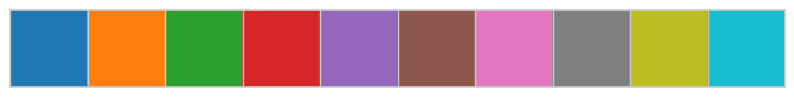

In [75]:
sns.palplot(sns.color_palette('tab10', 10))

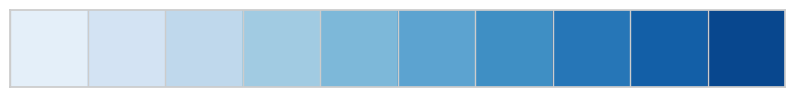

In [76]:
sns.palplot(sns.color_palette('Blues', 10))

### Membaca Dataset

#### Dataset Masih Terdapat Postage dan Discount

In [2]:
df = pd.read_csv('Dataset/clean_data.csv', encoding='utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#### Dataset Tidak Ada Postage dan Discount

In [4]:
clean = pd.read_csv('Dataset/clean_data_d_m_p_c.csv', encoding='utf-8')
clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,Date,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,20.34


### Deskriptif Statistik Dataset

In [5]:
clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,402263.0,12.053853,172.889743,-74215.0,2.00,5.00,12.00,74215.00
UnitPrice,402263.0,3.006021,13.780852,0.0,1.25,1.95,3.75,8142.75
CustomerID,402263.0,15287.823091,1713.827975,12346.0,13953.00,15152.00,16791.00,18287.00
year,402263.0,2010.934066,0.248168,2010.0,2011.00,2011.00,2011.00,2011.00
month,402263.0,7.611418,3.417085,1.0,5.00,8.00,11.00,12.00
day,402263.0,15.039134,8.654675,1.0,7.00,15.00,22.00,31.00
hour,402263.0,12.735588,2.285091,6.0,11.00,13.00,14.00,20.00
TotalValue,402263.0,20.672564,197.412637,-77183.6,4.20,11.25,19.50,77183.60


### Tren Penjualan Tahun 2010 dan 2011

In [6]:
quantity_per_year = clean.groupby('year')['Quantity'].sum()

quantity_per_year.to_frame().reset_index()

,year,Quantity
0,2010,292271.0
1,2011,4556548.0


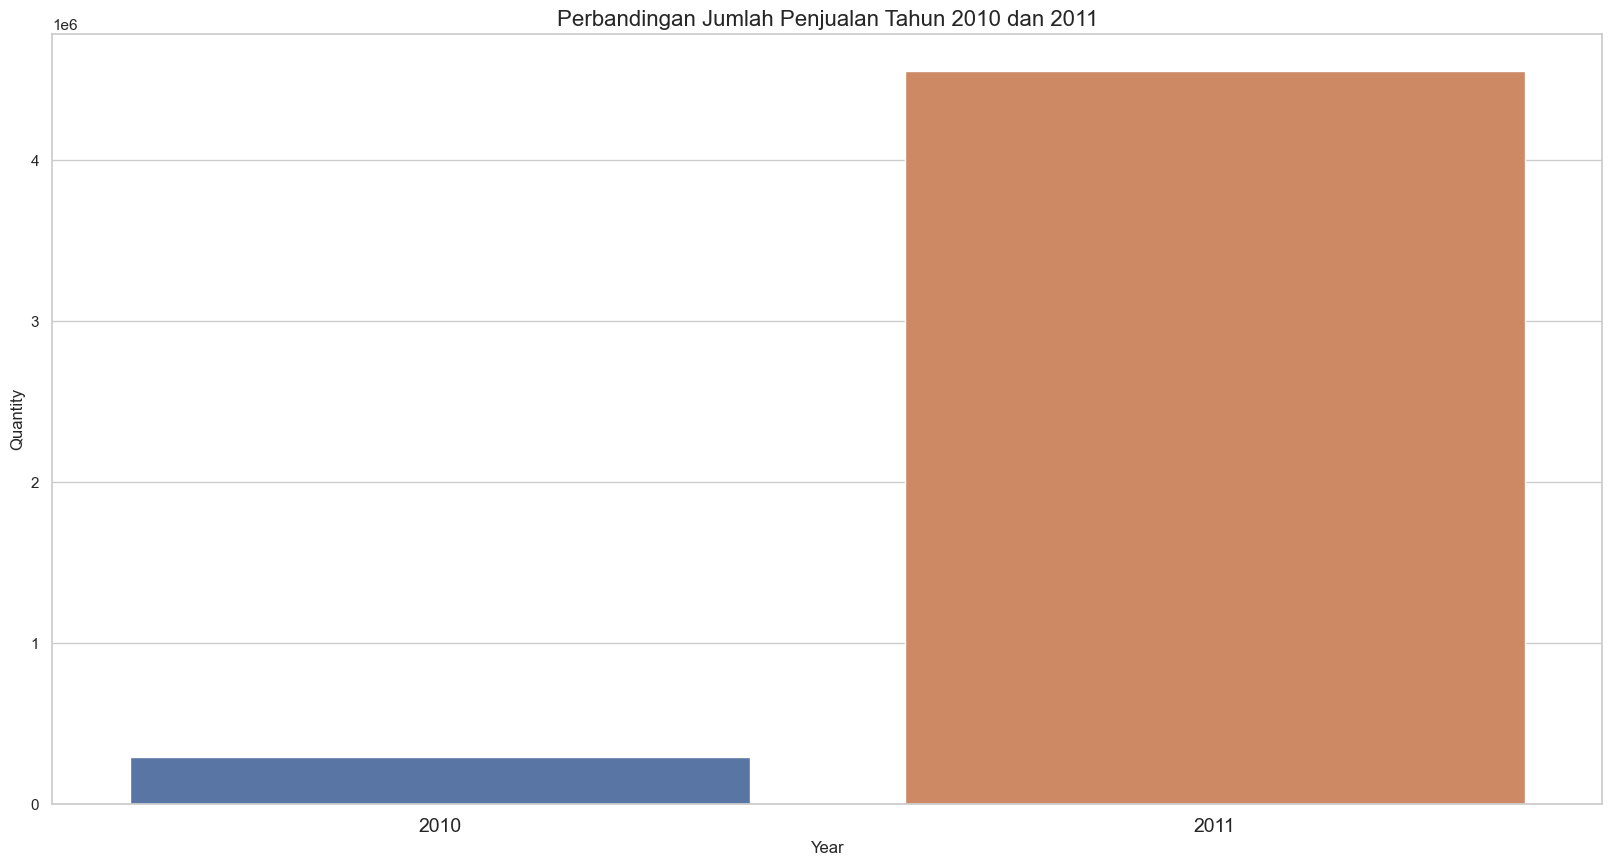

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(data=quantity_per_year, x=quantity_per_year.index, y=quantity_per_year.values)
plt.xticks(range(len(quantity_per_year.index)), quantity_per_year.index, fontsize=14)

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Perbandingan Jumlah Penjualan Tahun 2010 dan 2011', fontsize=16)
plt.show()

##### Hasil Analisa:
Terdapat Perbedaan Penjualan item yang cukup besar antara tahun 2010 dan tahun 2011. Hal ini dikarenakan pada dataset, transaksi tercatat tahun 2010 mulai dari bulan 12 atau bulan desember, sedangkan transaksi tercatat tahun 2011 dimulai dari awal tahun yaitu januari hingga akhir tahun yaitu bulan desember. Kesimpulannya, transaksi tercatat tahun 2010 hanya berjalan selama periode 1 bulan sedangkan transaksi tercatat tahun 2011 berjalan selama periode satu tahun sehingga menyebabkan perbedaan penjualan yang cukup besar antara kedua tahun tersebut.

### Quantity Trend

In [8]:
clean['Date'] = pd.to_datetime(clean['Date'])

In [9]:
quantity_trend = clean.groupby('Date')['Quantity'].agg('sum').reset_index()

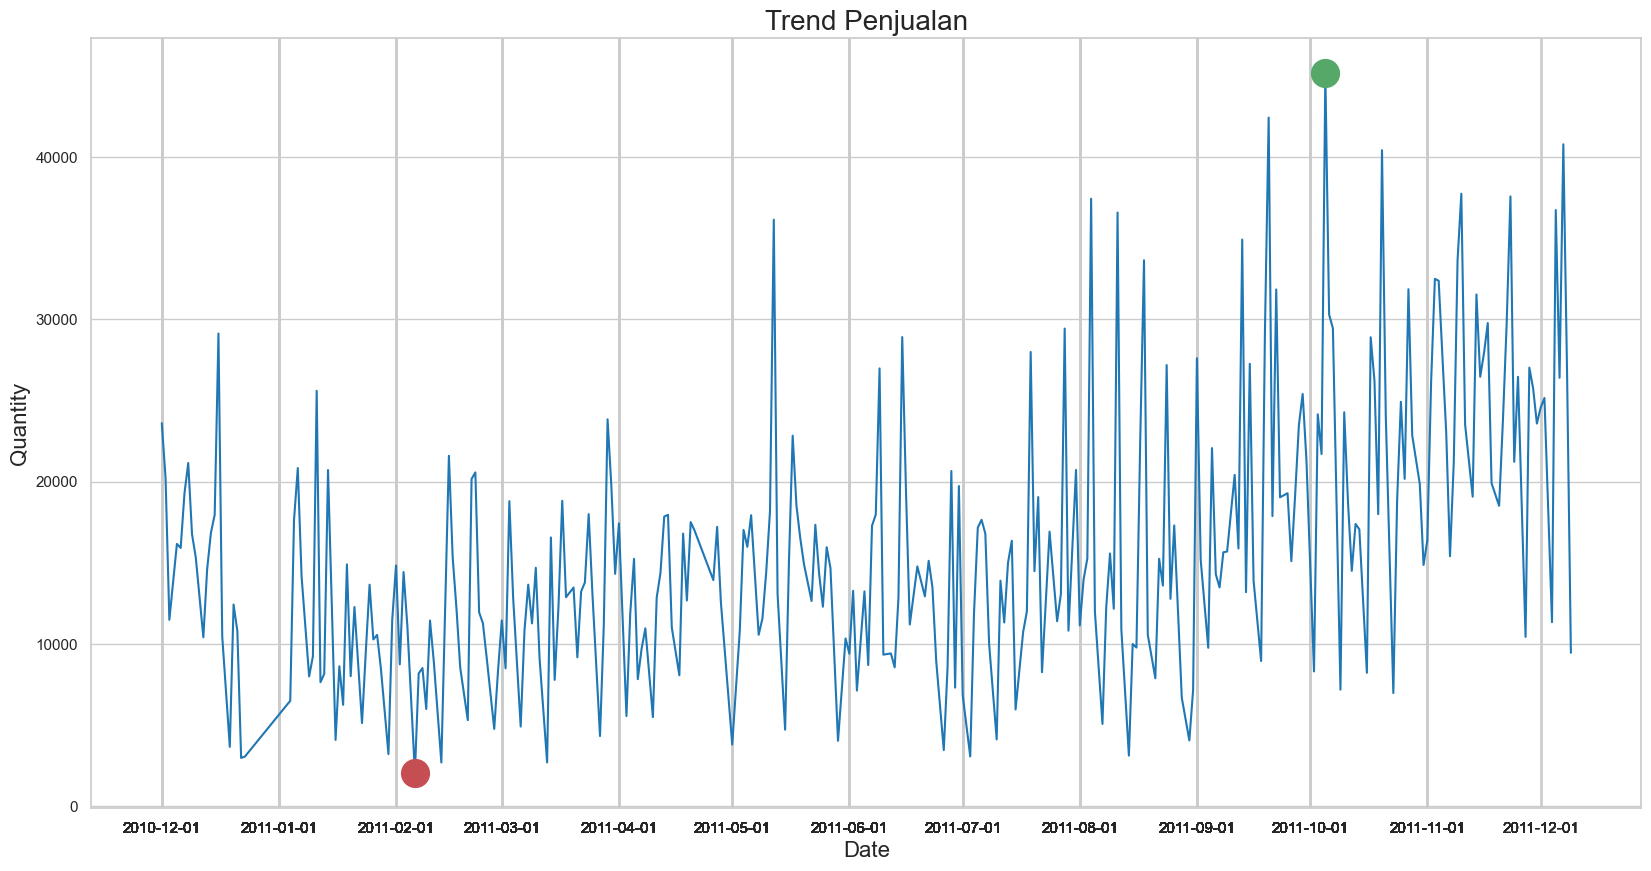

In [99]:
plt.figure(figsize=(20,10))
sns.lineplot(data=quantity_trend, x='Date', y='Quantity', color='#1f77b4')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.title('Trend Penjualan', fontsize=20)
plt.plot(quantity_trend[quantity_trend['Quantity']==quantity_trend['Quantity'].max()]['Date'], quantity_trend['Quantity'].max(), 'go', markersize=20)
plt.plot(quantity_trend[quantity_trend['Quantity']==quantity_trend['Quantity'].min()]['Date'], quantity_trend['Quantity'].min(), 'ro',markersize=20)

plt.xticks(quantity_trend['Date'].apply(lambda x: x.strftime('%Y-%m')))
plt.show()

### Frekuensi Per Hari

In [12]:
#make day of week column
clean['day_of_week'] = clean['Date'].dt.day_name()

In [103]:
dayofweek_frequency = clean.groupby('day_of_week')['Quantity'].agg(['sum', 'mean']).reset_index()

#sort values of day of week from monday
dayofweek_frequency['day_of_week'] = pd.Categorical(dayofweek_frequency['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
dayofweek_frequency = dayofweek_frequency.sort_values(by='day_of_week')
dayofweek_frequency

,day_of_week,sum,mean
1,Monday,731712.0,11.162144
4,Tuesday,900450.0,13.363559
5,Wednesday,929122.0,13.315209
3,Thursday,1107533.0,13.593865
0,Friday,723457.0,13.026342
2,Sunday,456545.0,7.300165


<Figure size 640x480 with 0 Axes>

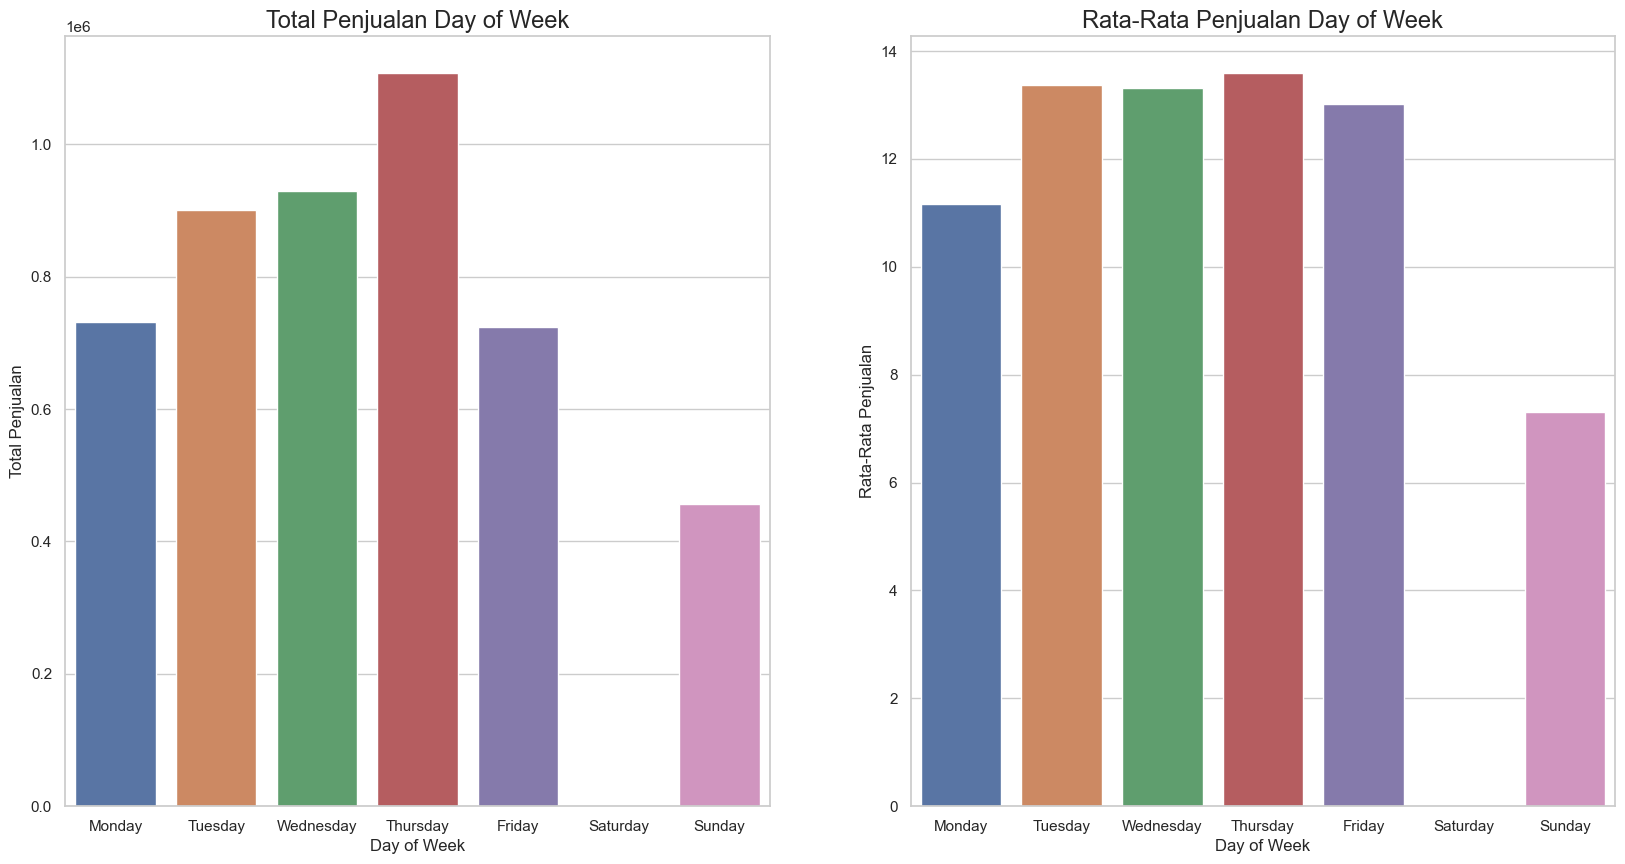

In [108]:
#compare mean, count, and sum of dayofweek in one figure
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=dayofweek_frequency, x='day_of_week', y='sum')
plt.xlabel('Day of Week')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan Day of Week', fontsize=17)
plt.subplot(1,2,2)
sns.barplot(data=dayofweek_frequency, x='day_of_week', y='mean')
plt.xlabel('Day of Week')
plt.ylabel('Rata-Rata Penjualan')
plt.title('Rata-Rata Penjualan Day of Week', fontsize=17)
plt.show()


### Frekuensi Per Month

In [113]:
month_frequency = clean.groupby('month')['Quantity'].agg(['sum', 'mean']).reset_index().sort_values('month', ascending=True)
month_frequency

,month,sum,mean
0,1,265062.0,12.269685
1,2,258326.0,12.856517
2,3,341274.0,12.447987
3,4,273972.0,11.974824
4,5,363735.0,12.733590
5,6,352536.0,12.823688
6,7,359254.0,13.232679
7,8,384003.0,14.021360
8,9,532340.0,13.165327
9,10,564433.0,11.231380


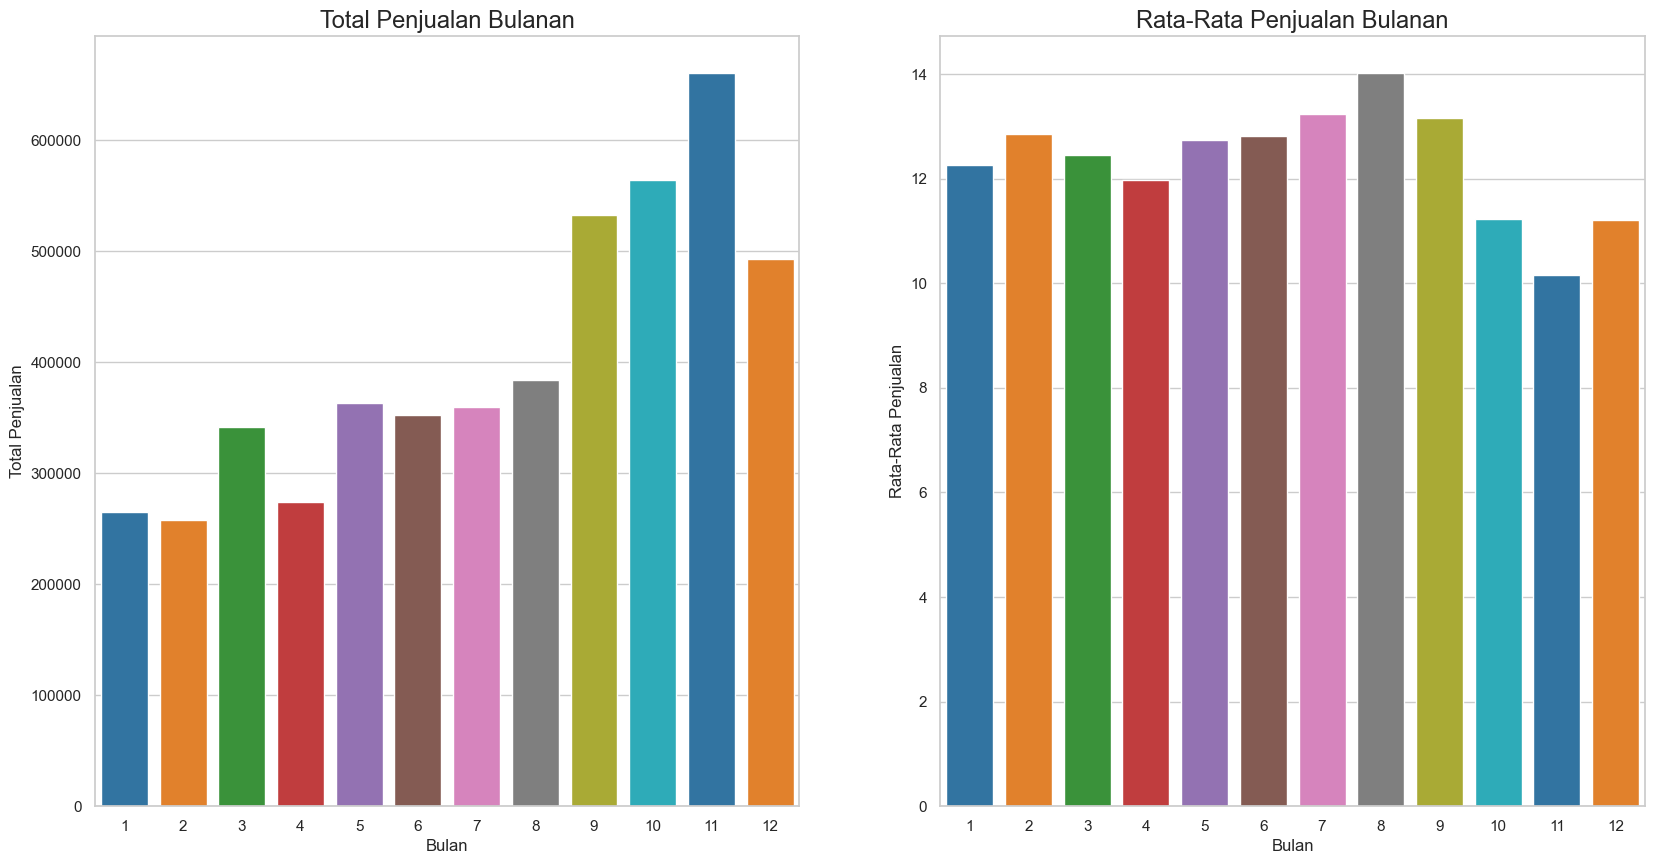

In [115]:
#compare mean, count, and sum of dayofweek in one figure
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=month_frequency, x='month', y='sum', palette='tab10')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.title('Total Penjualan Bulanan', fontsize=17)
plt.subplot(1,2,2)
sns.barplot(data=month_frequency, x='month', y='mean', palette='tab10')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Penjualan')
plt.title('Rata-Rata Penjualan Bulanan', fontsize=17)
plt.show()

### Revenue Trend

In [16]:
revenue_period = clean.groupby('Date')['TotalValue'].agg('sum').reset_index()

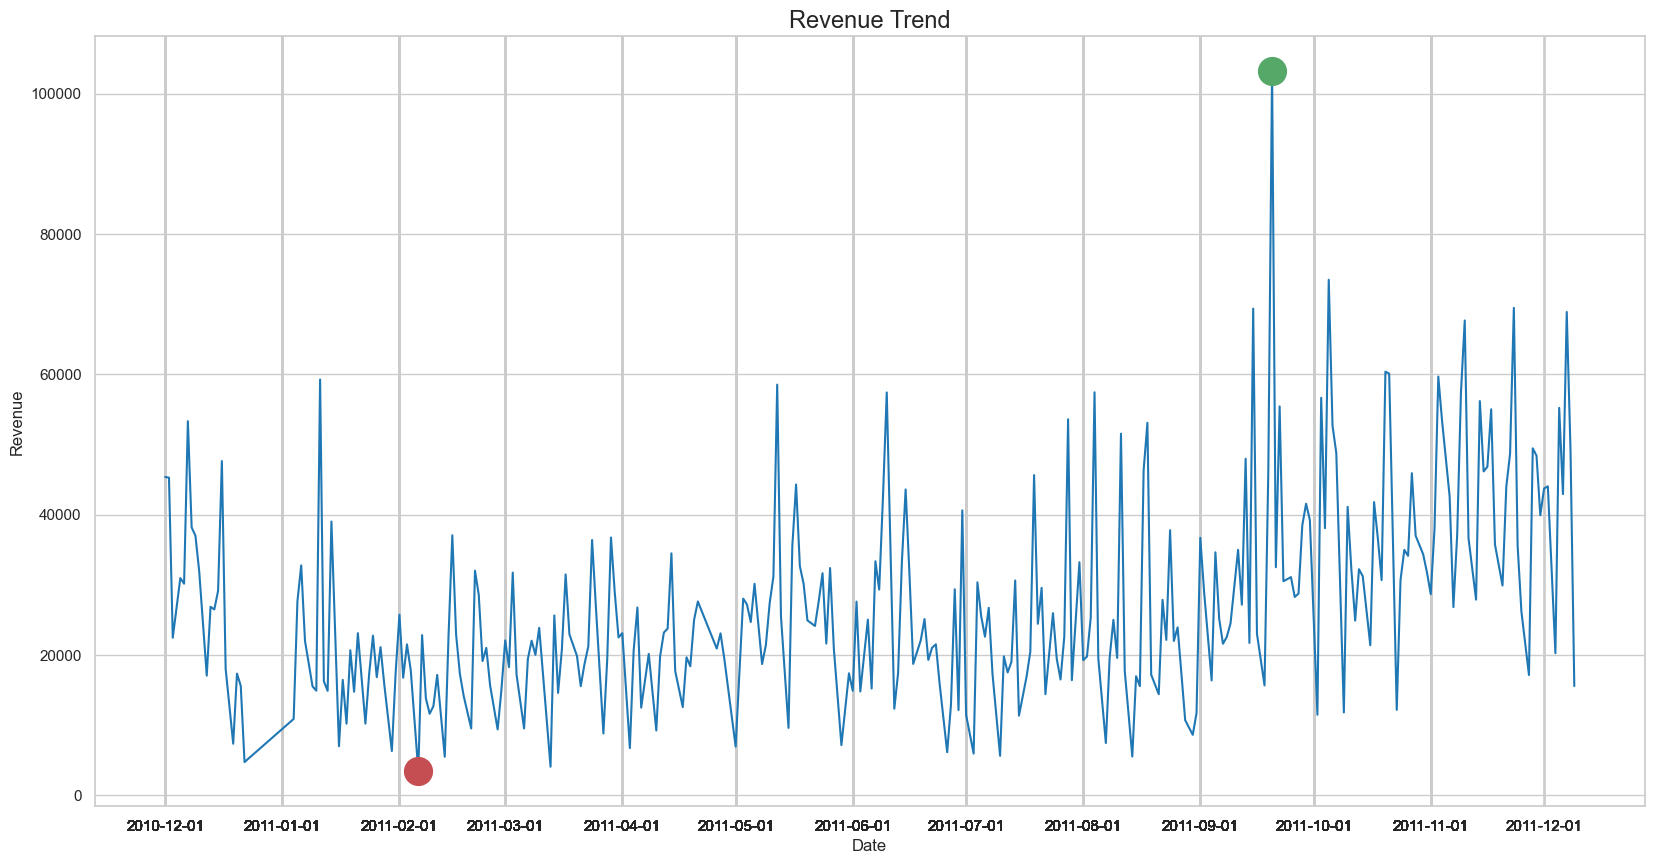

In [116]:
#line chart for revenue_period
plt.figure(figsize=(20,10))
sns.lineplot(data=revenue_period, x='Date', y='TotalValue', color='#1f77b4')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Trend', fontsize=17)
#give circle sign to max value 
plt.plot(revenue_period[revenue_period['TotalValue']==revenue_period['TotalValue'].max()]['Date'], revenue_period['TotalValue'].max(), 'go', markersize=20)
#give circle sign to min value
plt.plot(revenue_period[revenue_period['TotalValue']==revenue_period['TotalValue'].min()]['Date'], revenue_period['TotalValue'].min(), 'ro',markersize=20)
#show all the months
plt.xticks(revenue_period['Date'].apply(lambda x: x.strftime('%Y-%m')))
plt.show()

### Revenued Per Hari

In [82]:
dayofweek_revenue = clean.groupby('day_of_week')['TotalValue'].agg(['sum', 'mean']).reset_index()

#sort values of day of week from monday
dayofweek_revenue['day_of_week'] = pd.Categorical(dayofweek_revenue['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
dayofweek_revenue = dayofweek_revenue.sort_values(by='day_of_week')
dayofweek_revenue

,day_of_week,sum,mean
1,Monday,1272483.000,19.411514
4,Tuesday,1566830.861,23.253304
5,Wednesday,1524610.830,21.849136
3,Thursday,1897406.130,23.288772
0,Friday,1275671.001,22.969336
2,Sunday,778805.591,12.453119


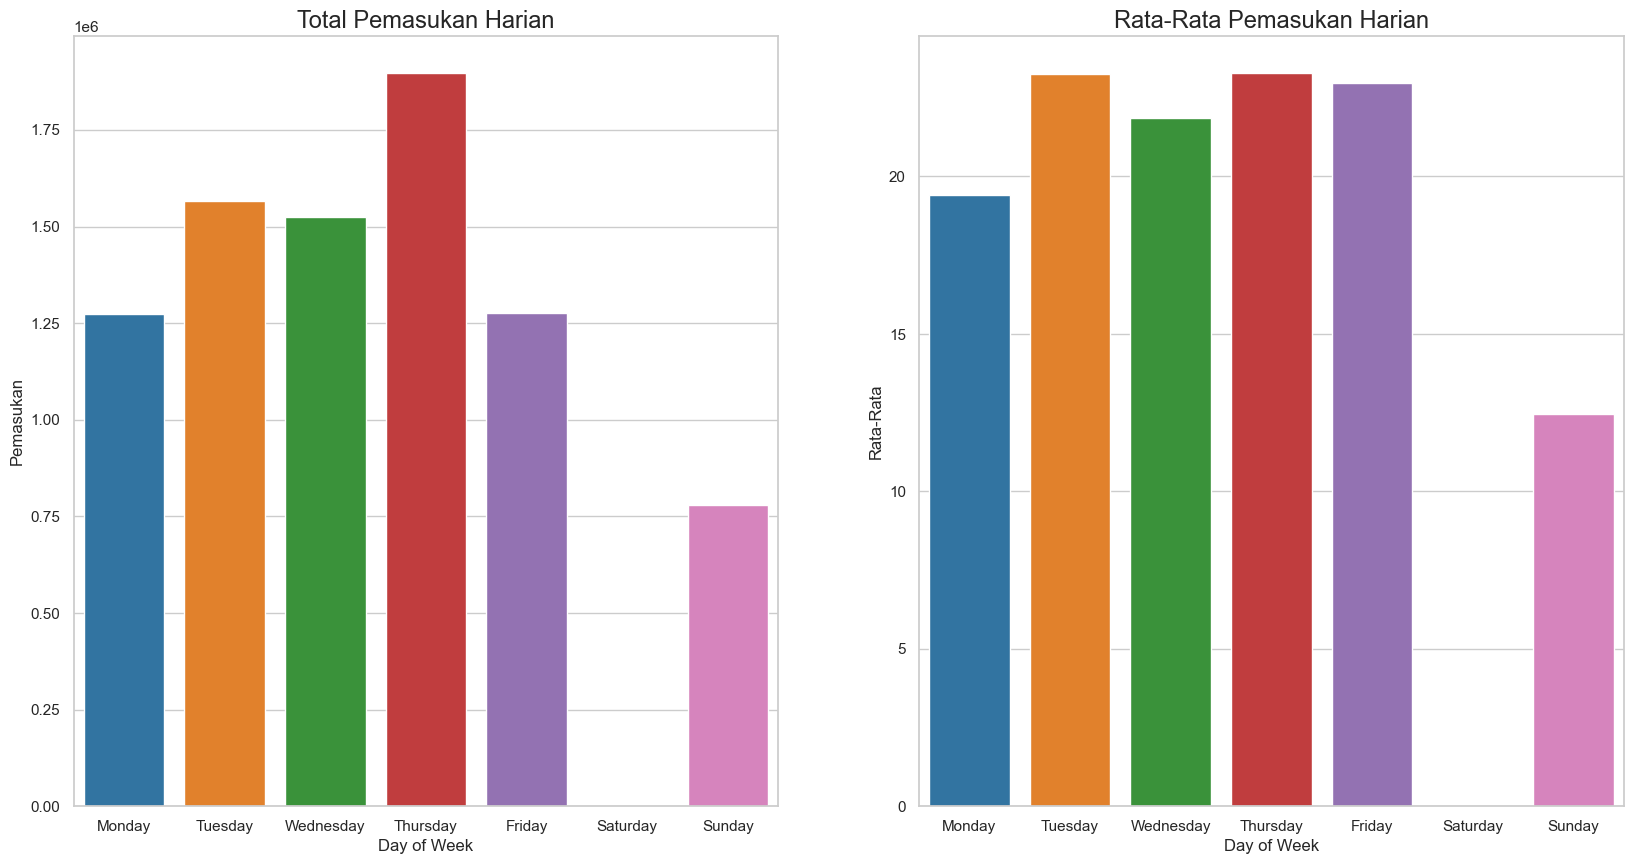

In [117]:
#compare mean, count, and sum of dayofweek in one figure
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=dayofweek_revenue, x='day_of_week', y='sum', palette='tab10')
plt.xlabel('Day of Week')
plt.ylabel('Pemasukan')
plt.title('Total Pemasukan Harian', fontsize=17)
plt.subplot(1,2,2)
sns.barplot(data=dayofweek_revenue, x='day_of_week', y='mean', palette='tab10')
plt.xlabel('Day of Week')
plt.ylabel('Rata-Rata')
plt.title('Rata-Rata Pemasukan Harian', fontsize=17)
plt.show()


### Revenued Per Bulan

In [88]:
month_Revenue = clean.groupby('month')['TotalValue'].agg(['sum', 'mean']).reset_index().sort_values('month', ascending=True)
month_Revenue

,month,sum,mean
0,1,473527.460,21.919523
1,2,433789.830,21.589102
2,3,576322.930,21.021408
3,4,421405.451,18.418875
4,5,659991.730,23.104909
5,6,643493.030,23.407407
6,7,583324.531,21.486041
7,8,616396.320,22.506895
8,9,925820.701,22.896518
9,10,966716.290,19.236221


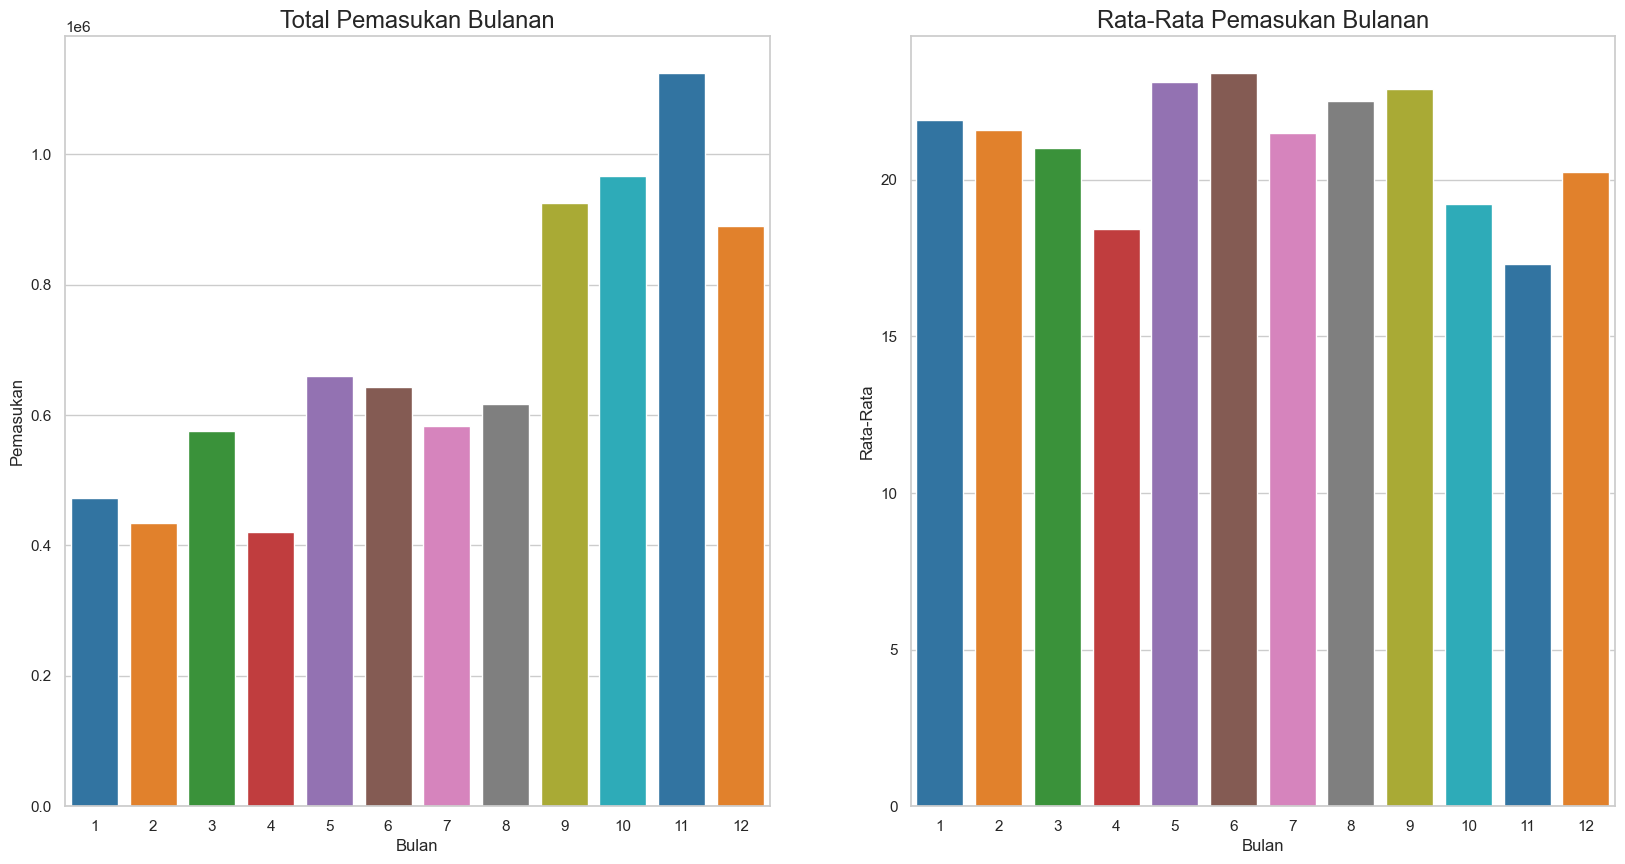

In [118]:
#compare mean, count, and sum of dayofweek in one figure
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=month_Revenue, x='month', y='sum', palette='tab10')
plt.xlabel('Bulan')
plt.ylabel('Pemasukan')
plt.title('Total Pemasukan Bulanan', fontsize=17)
plt.subplot(1,2,2)
sns.barplot(data=month_Revenue, x='month', y='mean', palette='tab10')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata')
plt.title('Rata-Rata Pemasukan Bulanan', fontsize=17)
plt.show()

### Analisa Perbandingan Daya Beli Tiap Negara

In [18]:
quantity_per_country = clean.groupby('Country')['Quantity'].agg('sum')

quantity_per_country = quantity_per_country.sort_values(ascending=False)

#change column name
quantity_per_country = quantity_per_country.to_frame()
quantity_per_country = quantity_per_country.reset_index()
quantity_per_country = quantity_per_country.rename(columns={'Quantity':'Total Quantity'})

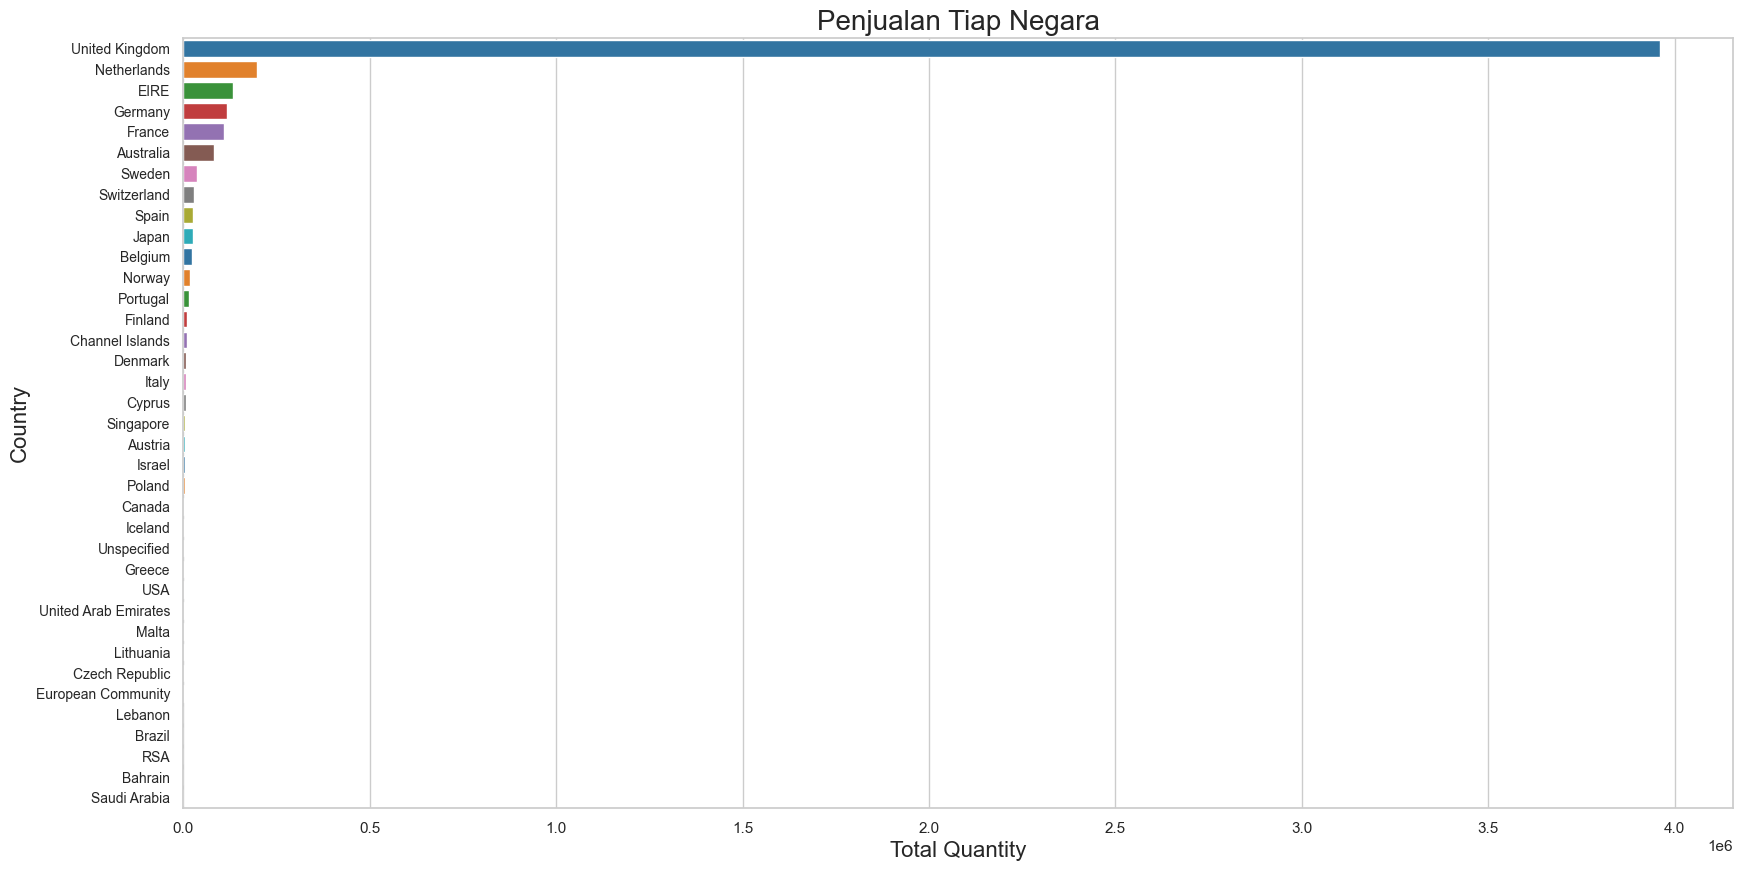

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(data=quantity_per_country, x='Total Quantity', y='Country', palette='tab10')
plt.title('Penjualan Tiap Negara', fontsize=20)
plt.xlabel('Total Quantity', fontsize=16)
plt.ylabel('Country',  fontsize=16)
plt.yticks(fontsize=10)

plt.show()

In [125]:
import plotly.express as px

# Create a choropleth map using plotly
fig = px.choropleth(quantity_per_country, locations='Country', locationmode='country names', color='Total Quantity',
                    hover_name='Country', color_continuous_scale='greens', range_color=(0, 100000))

# Update the map layout
fig.update_layout(
    title='Penjualan Tiap Negara',
    xaxis=dict(title='Total Quantity'),
    yaxis=dict(title='Country')
)

#add annotator for arrow directing to United Kingdom and United States
fig.add_annotation(x=0.49, y=0.83, text="United Kingdom", showarrow=True, arrowhead=1)
fig.add_annotation(x=0.23, y=0.82, text="Canada", showarrow=True, arrowhead=1)
fig.add_annotation(x=0.78, y=0.39, text="Australia", showarrow=True, arrowhead=1)

#adjust text font size
fig.update_layout(
    font=dict(
        size=16,
        color = 'red'
    )   
)
                


# Show the map
fig.show()


### Analisa Item Yang Sering Dibeli Tiap Negara

In [22]:
favourite_item = clean.groupby(['Country', 'Description'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
favourite_item

,Country,Description,Quantity
18779,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47982.0
16829,United Kingdom,JUMBO BAG RED RETROSPOT,40880.0
15326,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,32679.0
18692,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,32097.0
17618,United Kingdom,POPCORN HOLDER,28562.0
...,...,...,...
2814,Czech Republic,PINK METAL CHICKEN HEART,-24.0
9046,Israel,ENCHANTED BIRD COATHANGER 5 HOOK,-24.0
9188,Israel,SPACEBOY TV DINNER TRAY,-32.0
620,Austria,ANGEL DECORATION STARS ON DRESS,-48.0


In [200]:
clean[clean['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,Date,TotalValue,day_of_week
6919,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,2010-12-05 14:02:00,0.0,12647.0,Germany,2010,12,5,14,2010-12-05,0.0,Sunday
22798,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,2010,12,16,14,2010-12-16,0.0,Thursday
25735,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,2010-12-21 13:45:00,0.0,14911.0,EIRE,2010,12,21,13,2010-12-21,0.0,Tuesday
29493,540372,22090,PAPER BUNTING RETROSPOT,24.0,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011,1,6,16,2011-01-06,0.0,Thursday
29495,540372,22553,PLASTERS IN TIN SKULLS,24.0,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011,1,6,16,2011-01-06,0.0,Thursday
34994,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1.0,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,2011,1,13,15,2011-01-13,0.0,Thursday
54558,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,2011,2,10,13,2011-02-10,0.0,Thursday
86732,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36.0,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,2011,3,23,10,2011-03-23,0.0,Wednesday
93928,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5.0,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,2011,3,30,12,2011-03-30,0.0,Wednesday
98569,548871,22162,HEART GARLAND RUSTIC PADDED,2.0,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,2011,4,4,14,2011-04-04,0.0,Monday


### Most Buyed Items

In [126]:
on_demand = clean.groupby('Description')['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
on_demand

,Description,Quantity
3693,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215.0
1722,JUMBO BAG RED RETROSPOT,45066.0
208,ASSORTED COLOUR BIRD ORNAMENT,35314.0
3605,WHITE HANGING HEART T-LIGHT HOLDER,34147.0
2197,PACK OF 72 RETROSPOT CAKE CASES,33409.0
...,...,...
3591,WHITE CHERRY LIGHTS,-8.0
2753,ROBIN CHRISTMAS CARD,-9.0
2451,PINK POODLE HANGING DECORATION,-12.0
235,ASSORTED TUTTI FRUTTI ROUND BOX,-24.0


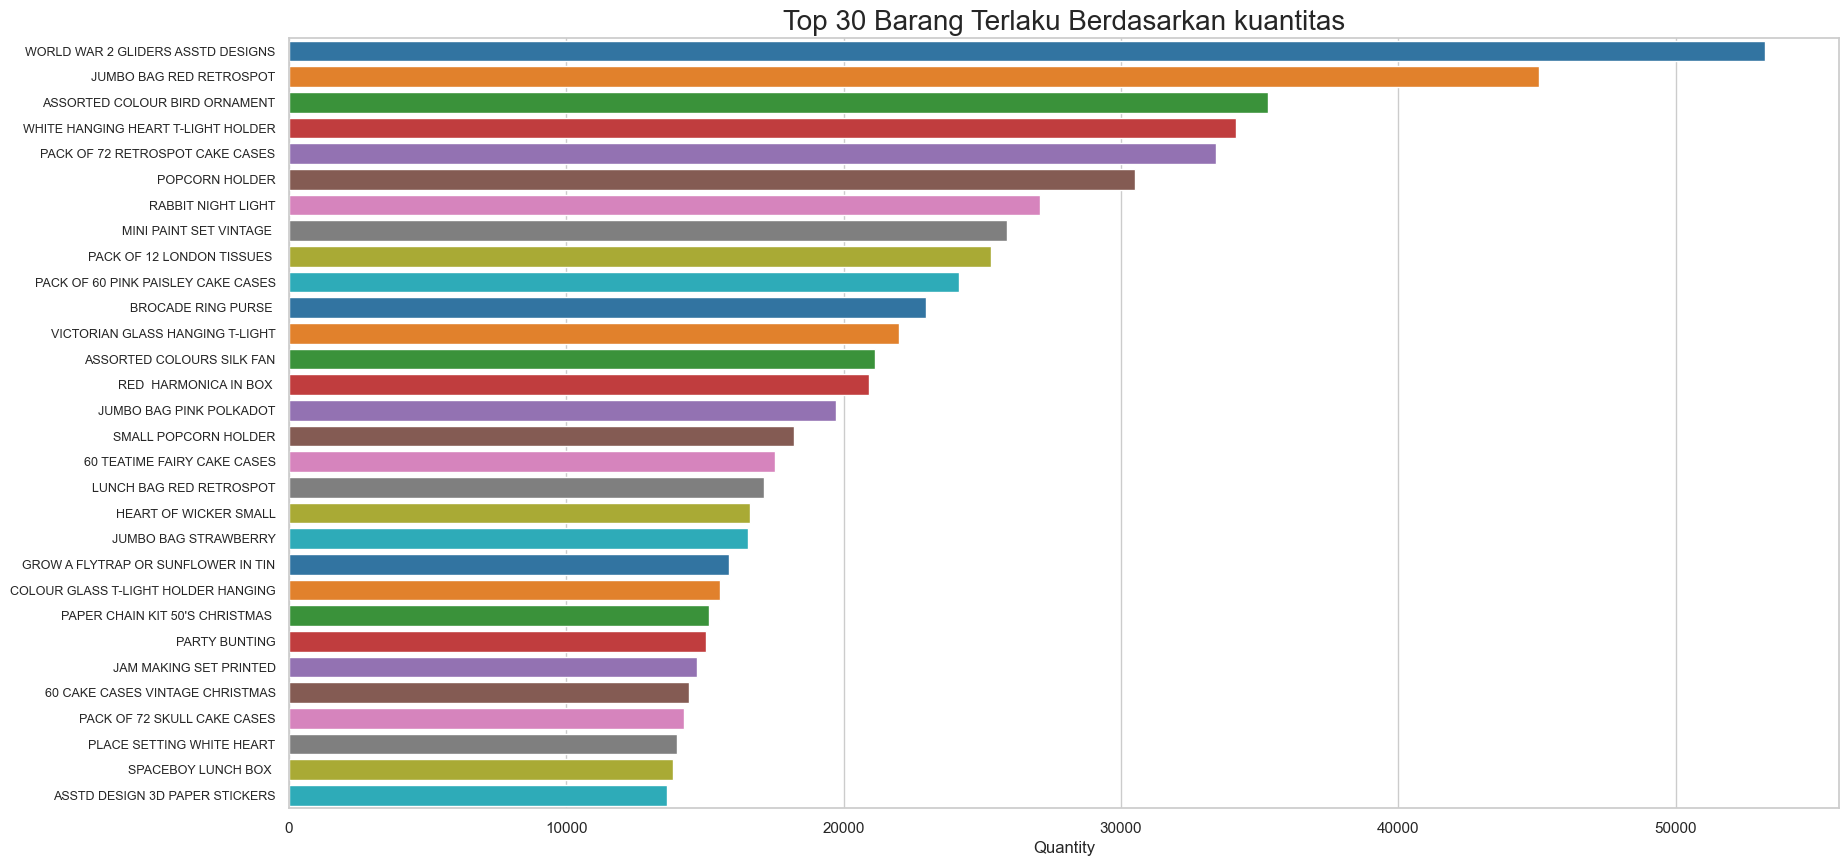

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(data=on_demand.head(30), x='Quantity', y='Description', palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('')
plt.title('Top 30 Barang Terlaku Berdasarkan kuantitas', fontsize=20)
plt.yticks(fontsize=9)
plt.show()

### Perbandingan Revenue Item

In [134]:
revenued_items = clean.groupby('Description')['TotalValue'].agg('sum').reset_index().sort_values('TotalValue', ascending=False)
revenued_items

,Description,TotalValue
2690,REGENCY CAKESTAND 3 TIER,132870.40
3605,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
1722,JUMBO BAG RED RETROSPOT,83236.76
2535,POSTAGE,77803.96
2272,PARTY BUNTING,67687.53
...,...,...
235,ASSORTED TUTTI FRUTTI ROUND BOX,-39.60
3661,WOODEN BOX ADVENT CALENDAR,-45.70
850,CREAM SWEETHEART MAGAZINE RACK,-46.85
3591,WHITE CHERRY LIGHTS,-54.00


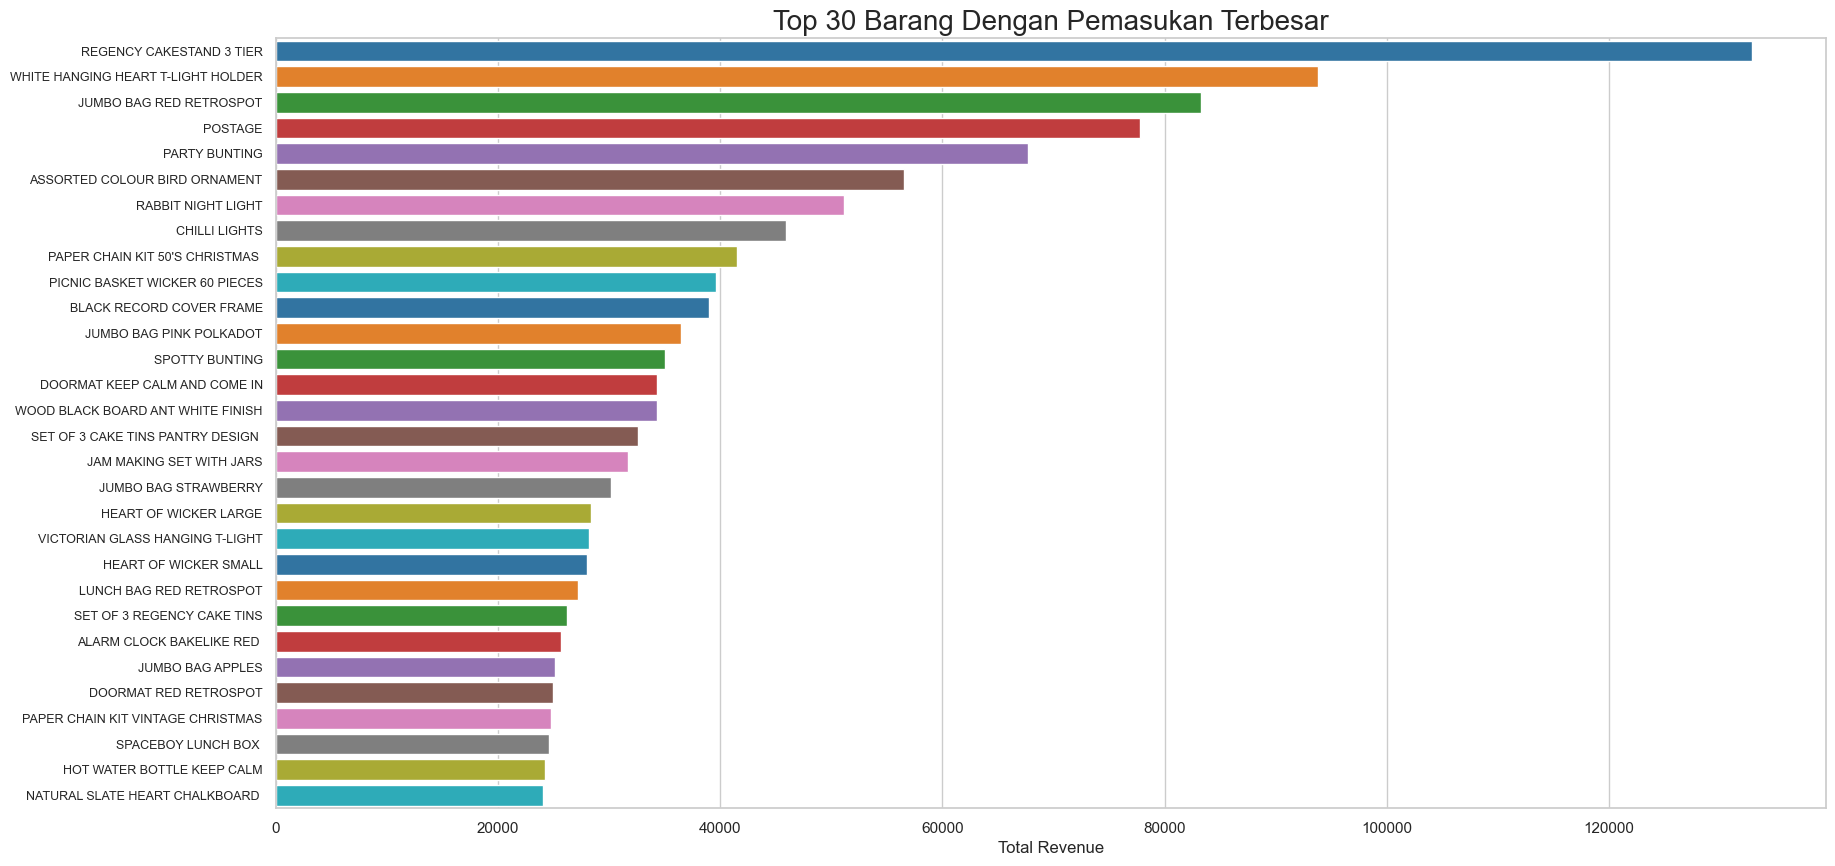

In [142]:
plt.figure(figsize=(20,10))
sns.barplot(data=revenued_items.head(30), x='TotalValue', y='Description', palette='tab10')
plt.xlabel('Total Revenue')
plt.ylabel('')
plt.title('Top 30 Barang Dengan Pemasukan Terbesar', fontsize=20)
plt.yticks(fontsize=9)
plt.show()

#### Most Buyed Items Per Country

In [ ]:
favourite_item = clean.groupby(['Country', 'Description'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
favourite_item

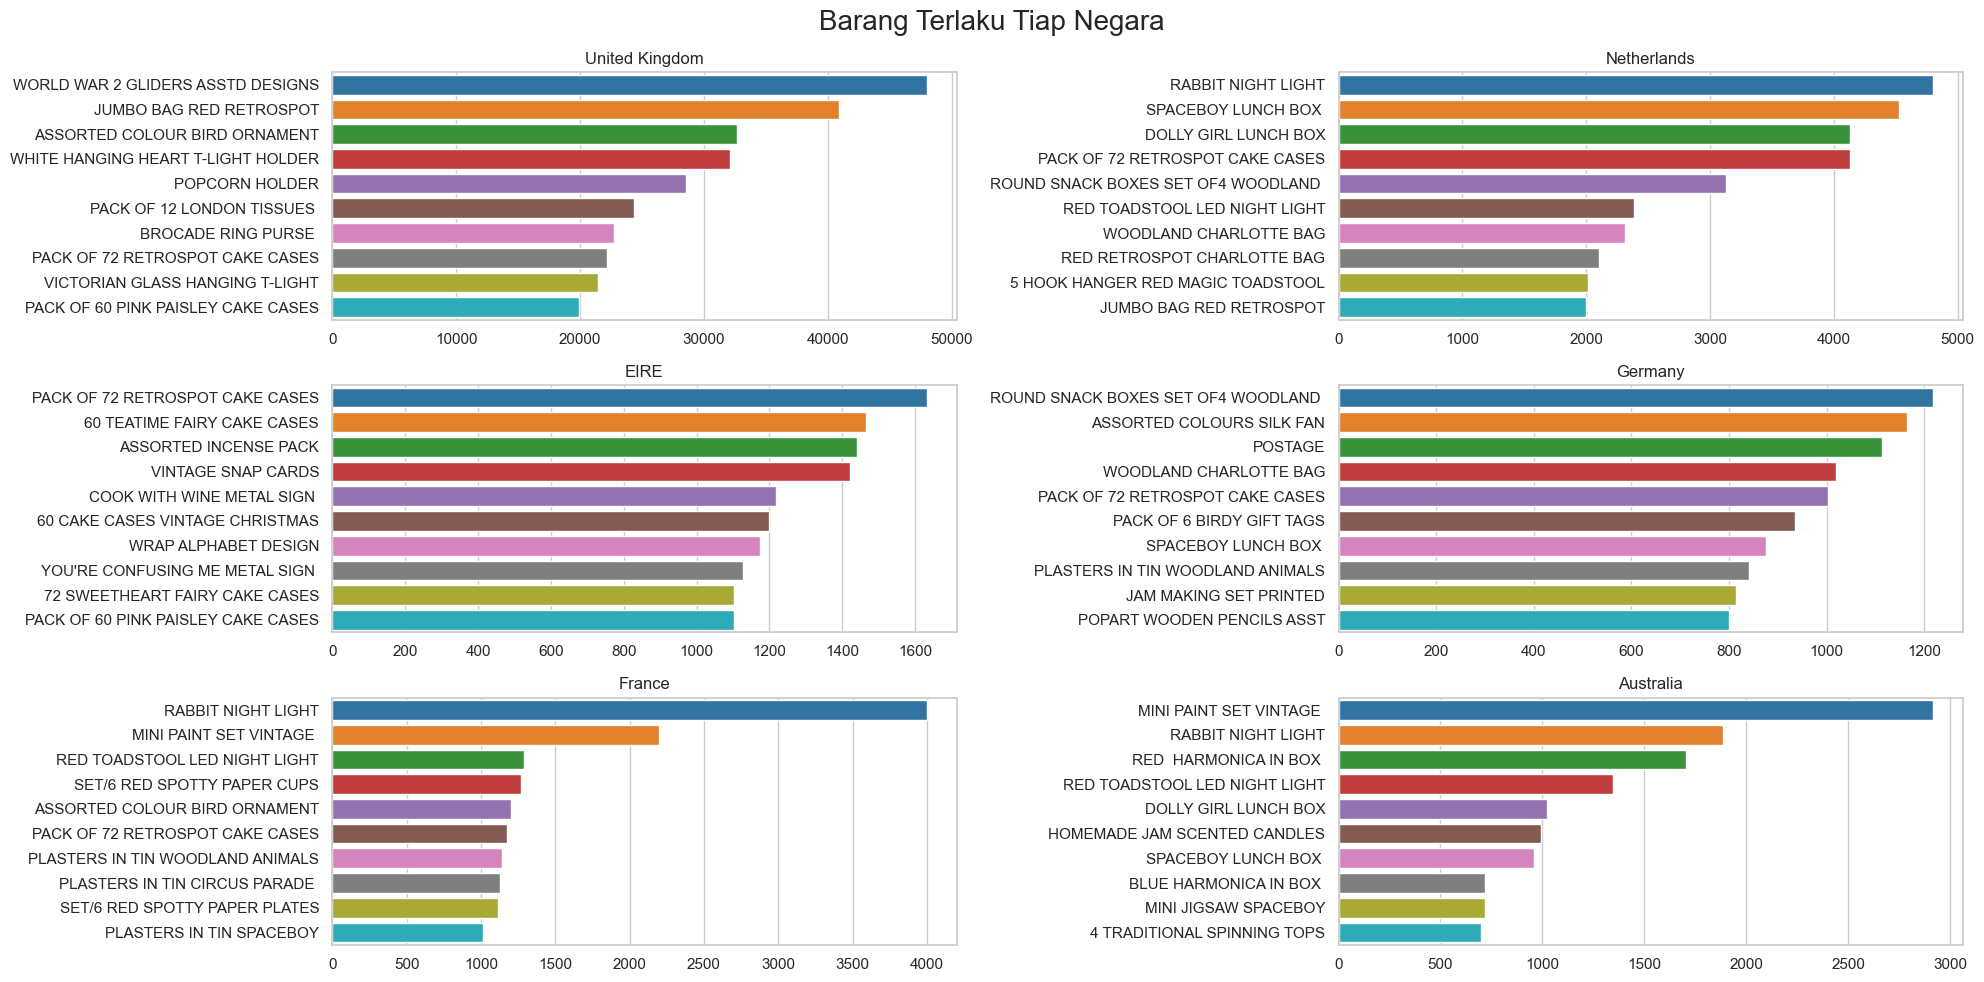

In [143]:
#combine that most buyed items in one figure
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Barang Terlaku Tiap Negara', fontsize=20)
for ax, item in zip(axes.flatten(), quantity_per_country['Country'].head(6)):
    sns.barplot(data=favourite_item[favourite_item['Country']==item].head(10), x='Quantity', y='Description', palette='tab10', ax=ax)
    ax.set_title(item)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()


#### Perbandingan Item yang Dilakukan Refund

In [26]:
refunded_item = clean.groupby(['CustomerID', 'Description'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=True)
refunded_item = refunded_item[refunded_item['Quantity'] < 0]
refunded_item['Quantity'] = refunded_item['Quantity'] * -1
refunded_item

,CustomerID,Description,Quantity
159908,15838.0,ROTATING SILVER ANGELS T-LIGHT HLDR,9360.0
155715,15749.0,TEA TIME PARTY BUNTING,1300.0
188879,16546.0,HEART WOODEN CHRISTMAS DECORATION,192.0
188865,16546.0,CARD HOLDER GINGHAM HEART,192.0
197628,16742.0,ROSES REGENCY TEACUP AND SAUCER,168.0
...,...,...,...
169645,16048.0,BLACK BAROQUE WALL CLOCK,1.0
240930,17677.0,RED RETROSPOT PEG BAG,1.0
61808,13736.0,GIN AND TONIC MUG,1.0
117185,14903.0,RED RETROSPOT CAKE STAND,1.0


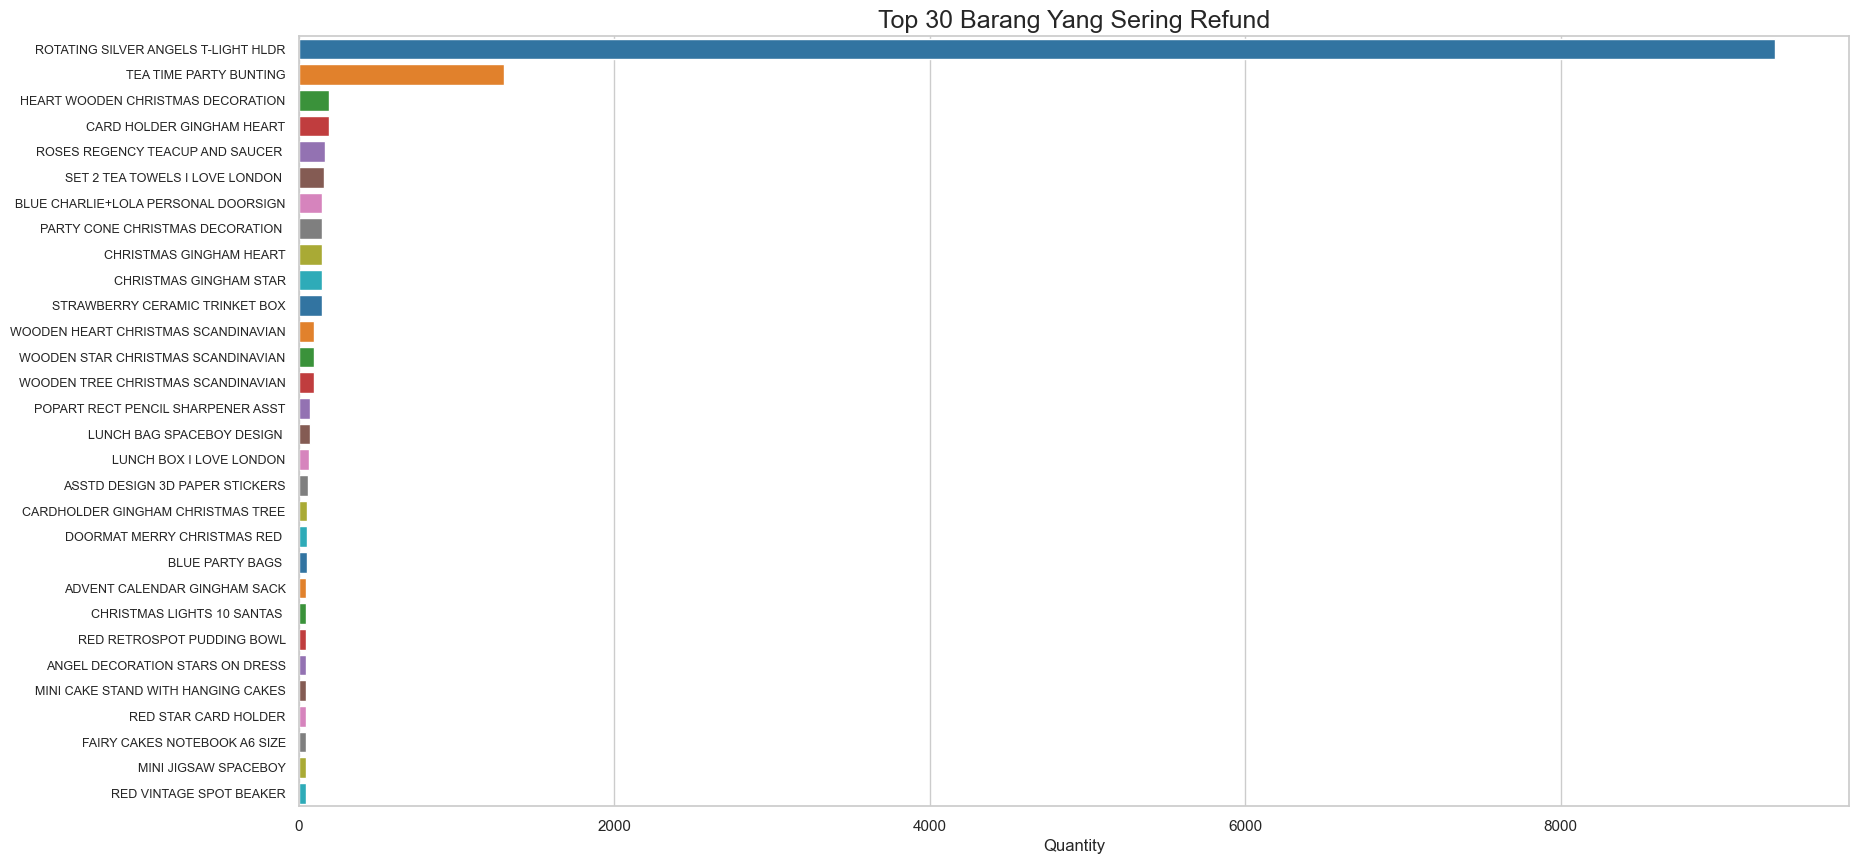

In [146]:
plt.figure(figsize=(20,10))
sns.barplot(data=refunded_item.head(30), x='Quantity', y='Description', palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('')
plt.title('Top 30 Barang Yang Sering Refund', fontsize=18) 
plt.yticks(fontsize=9)
plt.show()


#### Negara yang Sering Melakukan Refund

In [28]:
refund_per_country  = clean.groupby(['Country', 'CustomerID'])['Quantity'].agg('sum').reset_index().sort_values('Quantity',ascending=True)
refund_per_country['Quantity'] = refund_per_country['Quantity'] * -1
#replace value of quantity that < 0
refund_per_country.loc[refund_per_country['Quantity'] < 0, 'Quantity'] = 0
refund_per_country.drop('CustomerID', axis=1, inplace=True)
refund_per_country = refund_per_country.groupby('Country')['Quantity'].agg('sum').reset_index().sort_values('Quantity',ascending=False)

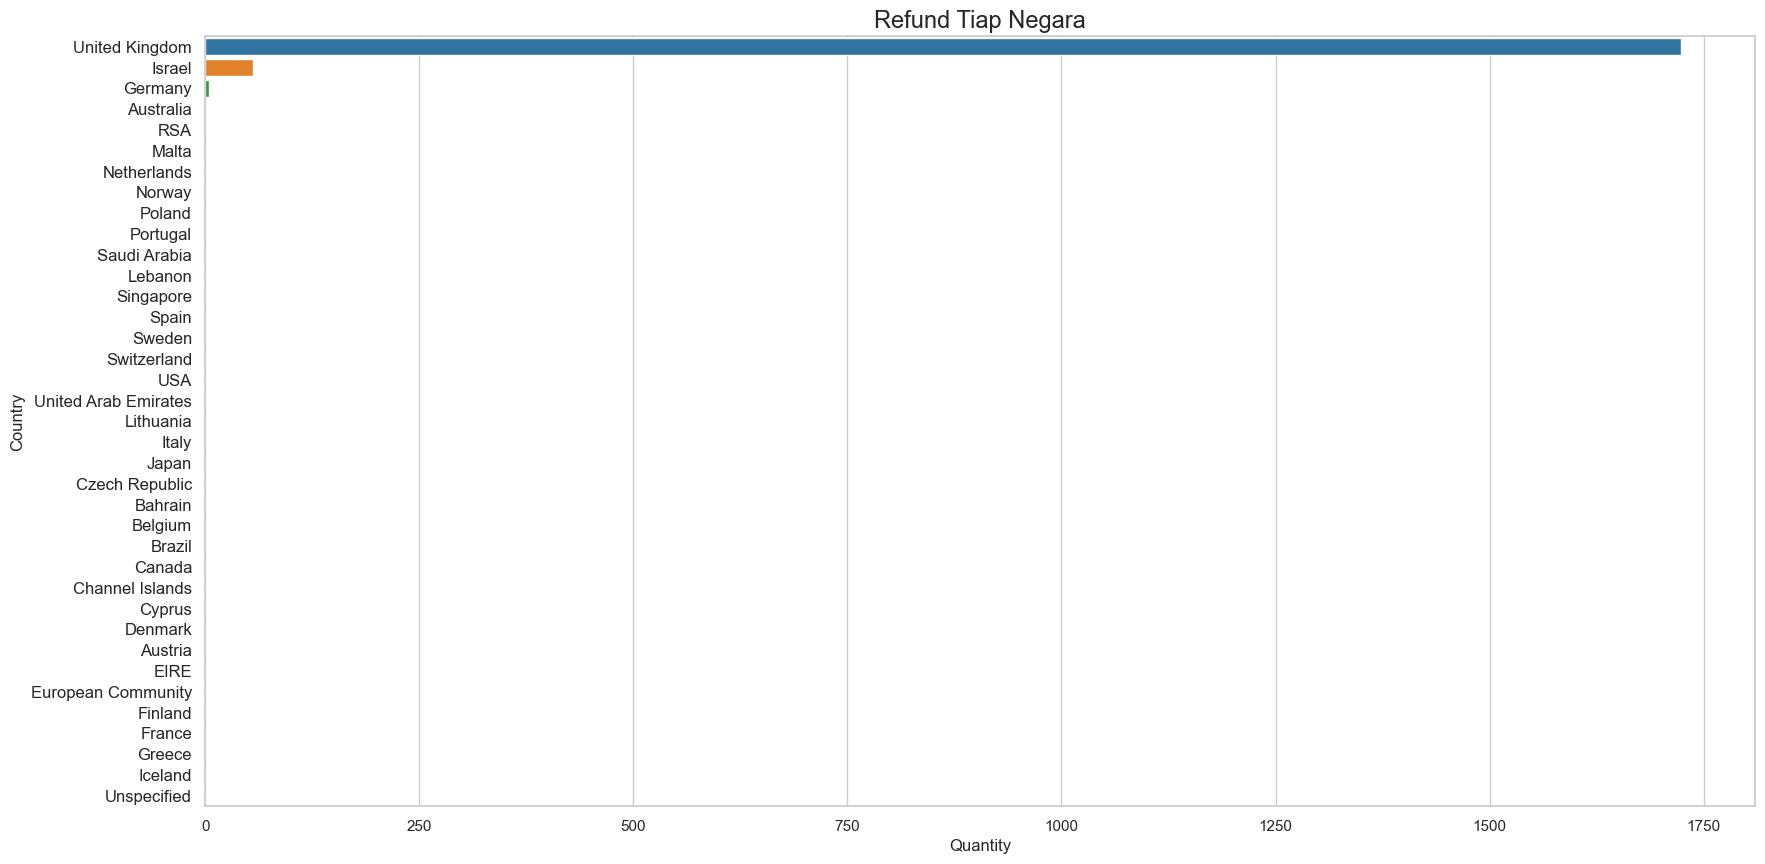

In [147]:
#adjust figsize
plt.figure(figsize=(20, 10))

sns.barplot(data=refund_per_country, x='Quantity', y='Country', palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('Refund Tiap Negara', fontsize=17)
plt.yticks(fontsize=12)
plt.show()

In [30]:
refund_per_country[refund_per_country['Quantity'] > 0]

,Country,Quantity
35,United Kingdom,1724.0
17,Israel,56.0
14,Germany,4.0


#### Customer Yang Banyak Melakukan Refund

In [31]:
customer_refund = clean.groupby('CustomerID')['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=True)
customer_refund['CustomerID'] = customer_refund['CustomerID'].astype(str)
customer_refund['Quantity'] = customer_refund['Quantity'] * -1

customer_refund.loc[customer_refund['Quantity'] < 0, 'Quantity'] = 0

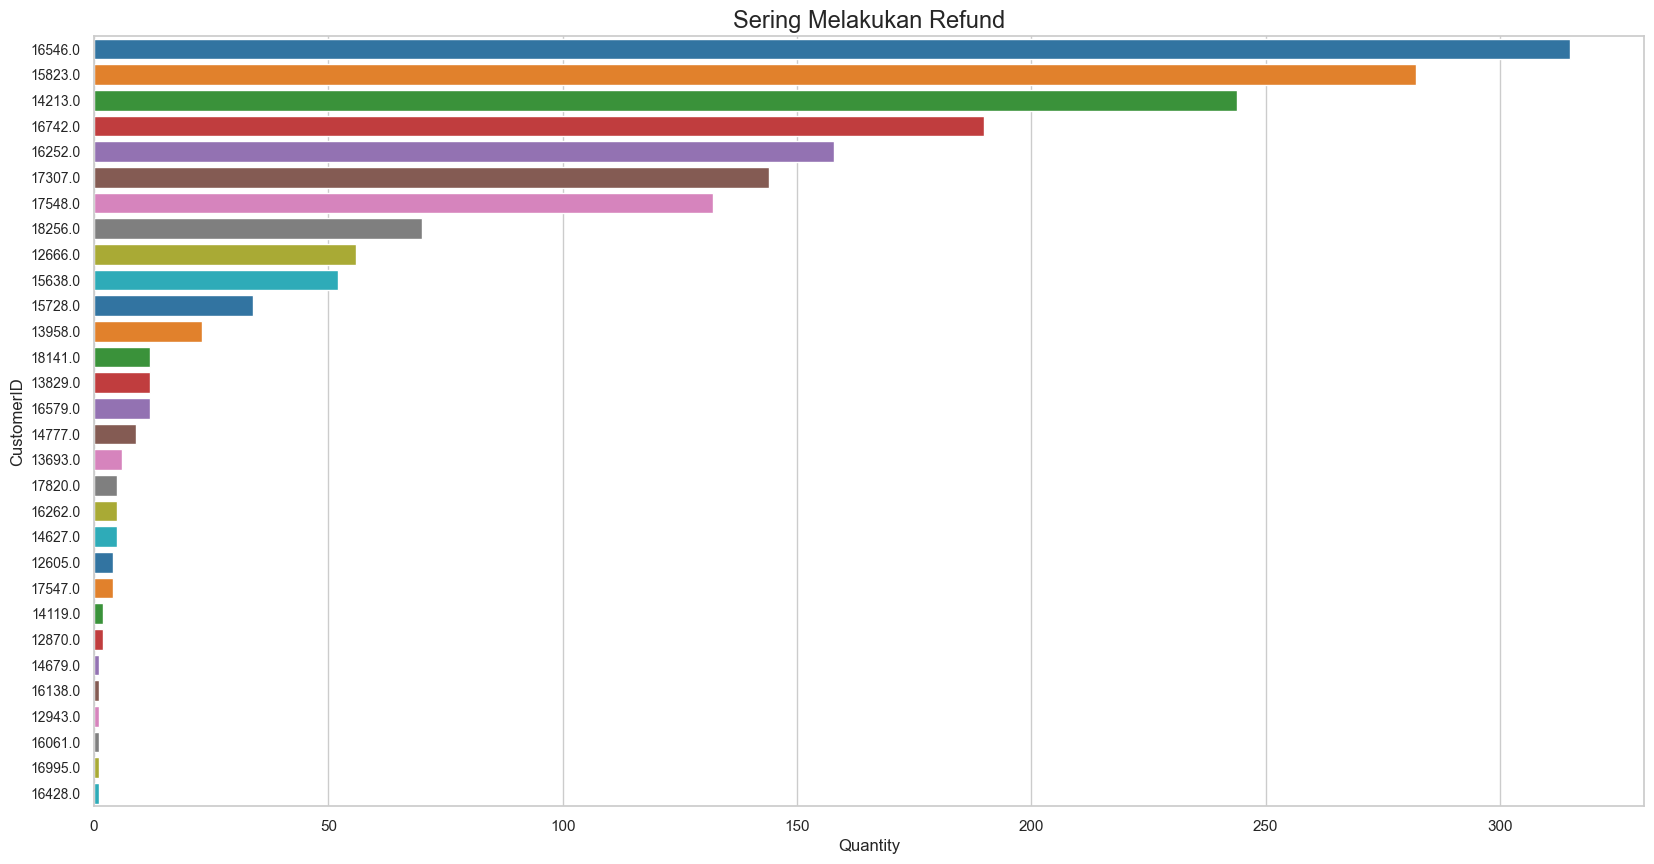

In [149]:
plt.figure(figsize=(20,10))
sns.barplot(data=customer_refund.head(30), x='Quantity', y='CustomerID', palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('CustomerID')
plt.title('Sering Melakukan Refund', fontsize=17)
plt.yticks(fontsize=10)
plt.show()

In [33]:
customer_refund[customer_refund['Quantity'] > 0].head()

,CustomerID,Quantity
3096,16546.0,315.0
2571,15823.0,282.0
1381,14213.0,244.0
3238,16742.0,190.0
2885,16252.0,158.0


### Frekuensi Pembelian Customer

In [34]:
frequency = clean.groupby('CustomerID')['Quantity'].agg('count').reset_index().sort_values('Quantity', ascending=False)
frequency = frequency.rename(columns={'Quantity':'Frequency'})
frequency['CustomerID'] = frequency['CustomerID'].astype(str)
frequency.head()

,CustomerID,Frequency
4033,17841.0,7854
1891,14911.0,5855
1297,14096.0,4999
328,12748.0,4580
1670,14606.0,2663


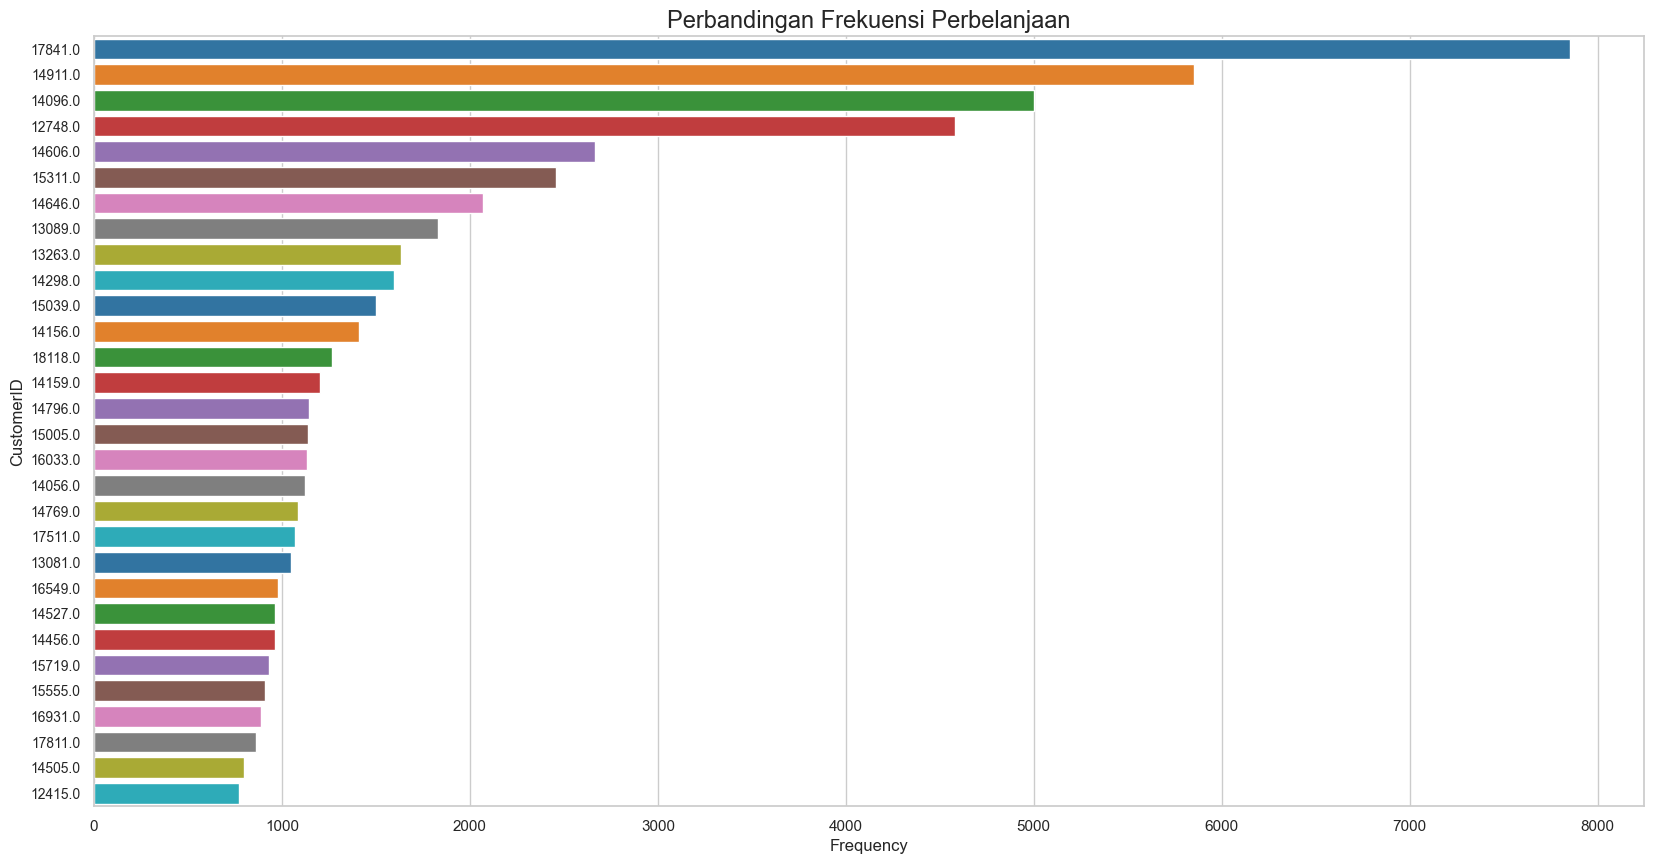

In [150]:
plt.figure(figsize=(20,10))
sns.barplot(data=frequency.head(30), x='Frequency', y='CustomerID', palette='tab10')
plt.xlabel('Frequency')
plt.ylabel('CustomerID')
plt.title('Perbandingan Frekuensi Perbelanjaan', fontsize=17)
plt.yticks(fontsize=10)
plt.show()

### Frekuensi Pembelian Customer Tiap Negara

In [36]:
#make plot for customer frequency each country
customer_frequency = clean.groupby(['Country', 'CustomerID'])['Quantity'].agg('count').reset_index().sort_values('Quantity', ascending=False)
customer_frequency = customer_frequency.rename(columns={'Quantity':'Frequency'})
customer_frequency['CustomerID'] = customer_frequency['CustomerID'].astype(str)
customer_frequency.head()

,Country,CustomerID,Frequency
4038,United Kingdom,17841.0,7854
81,EIRE,14911.0,5855
1332,United Kingdom,14096.0,4999
426,United Kingdom,12748.0,4580
1698,United Kingdom,14606.0,2663


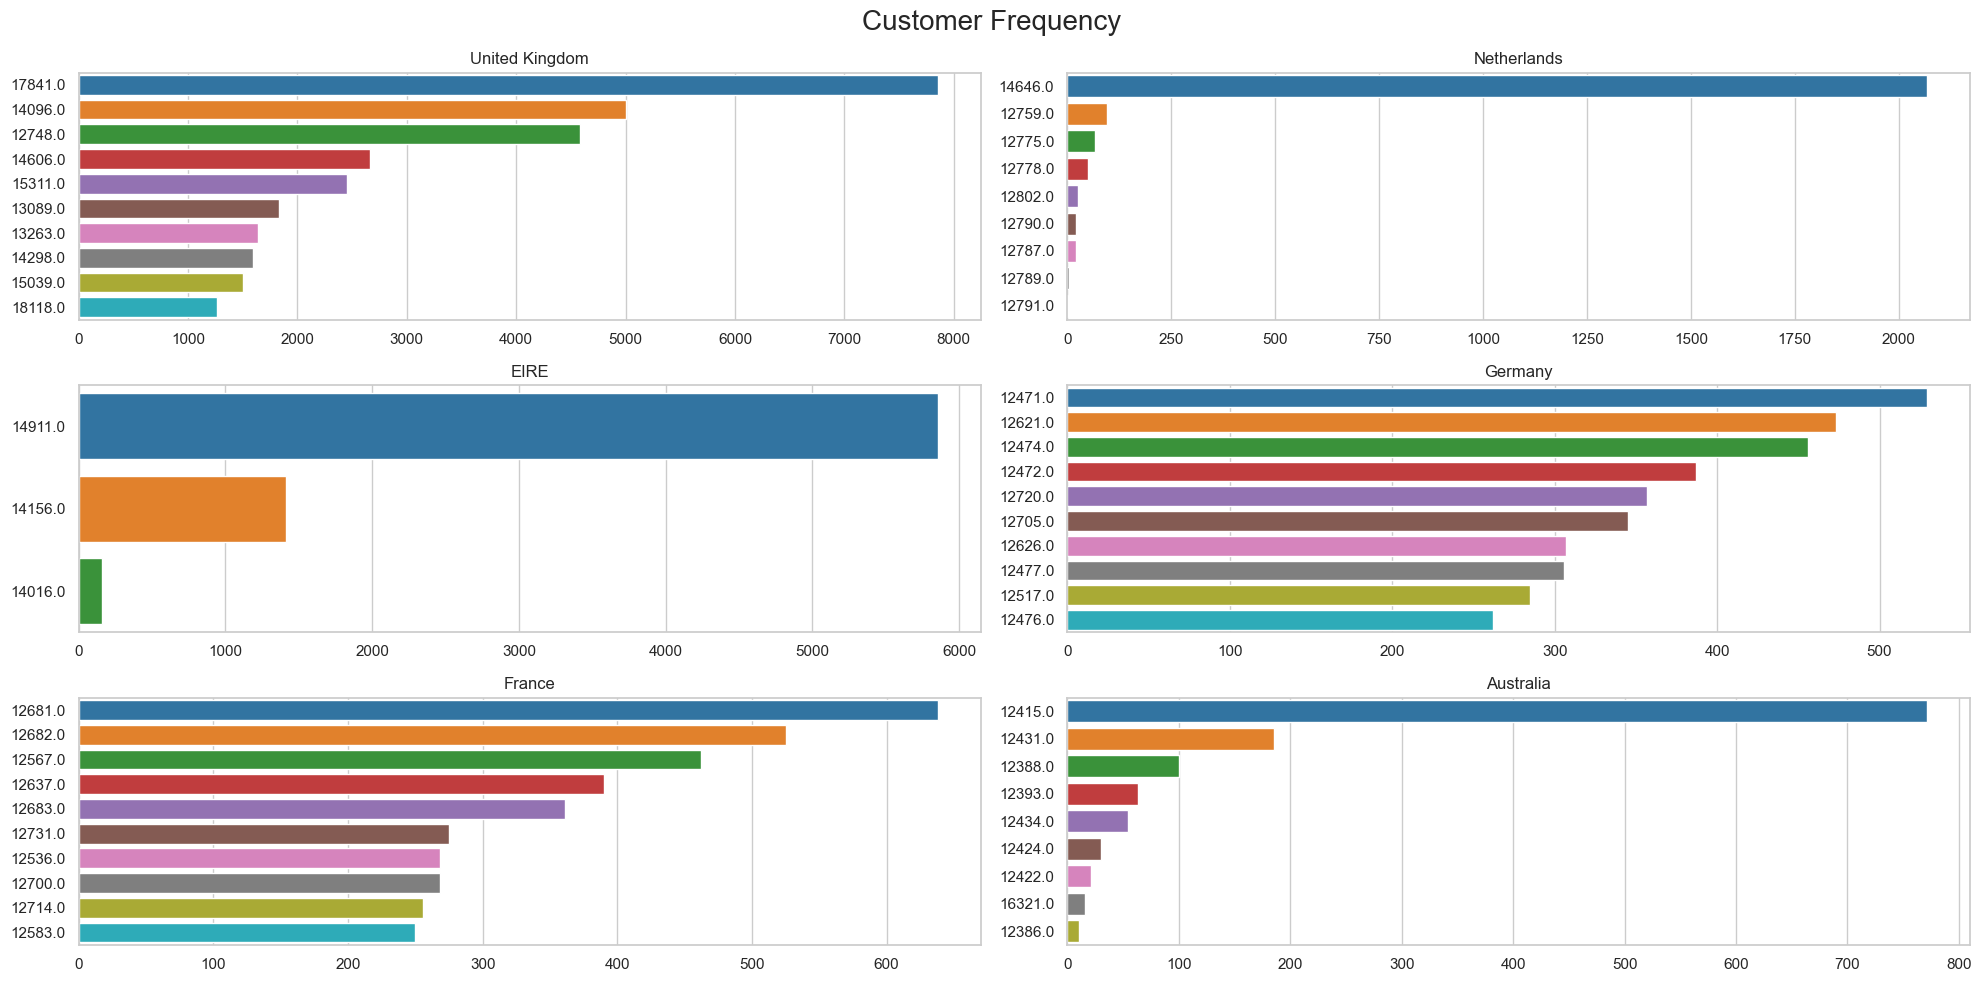

In [37]:
#plot customer frequency in each country and in one figure
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Customer Frequency', fontsize=20)
for ax, item in zip(axes.flatten(), quantity_per_country['Country'].head(6)):
    sns.barplot(data=customer_frequency[customer_frequency['Country']==item].head(10), x='Frequency', y='CustomerID', palette='tab10', ax=ax)
    ax.set_title(item)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

### Customer Dengan Pembelian Terbesar

In [38]:
revenued_customer = clean.groupby('CustomerID')['TotalValue'].agg('sum').reset_index().sort_values('TotalValue', ascending=False)
revenued_customer = revenued_customer.rename(columns={'TotalValue':'Total Revenued'})
revenued_customer['CustomerID'] = revenued_customer['CustomerID'].astype(str)
revenued_customer.head()

,CustomerID,Total Revenued
1699,14646.0,278428.58
4223,18102.0,259657.30
3749,17450.0,189735.53
1891,14911.0,132431.66
55,12415.0,122219.86


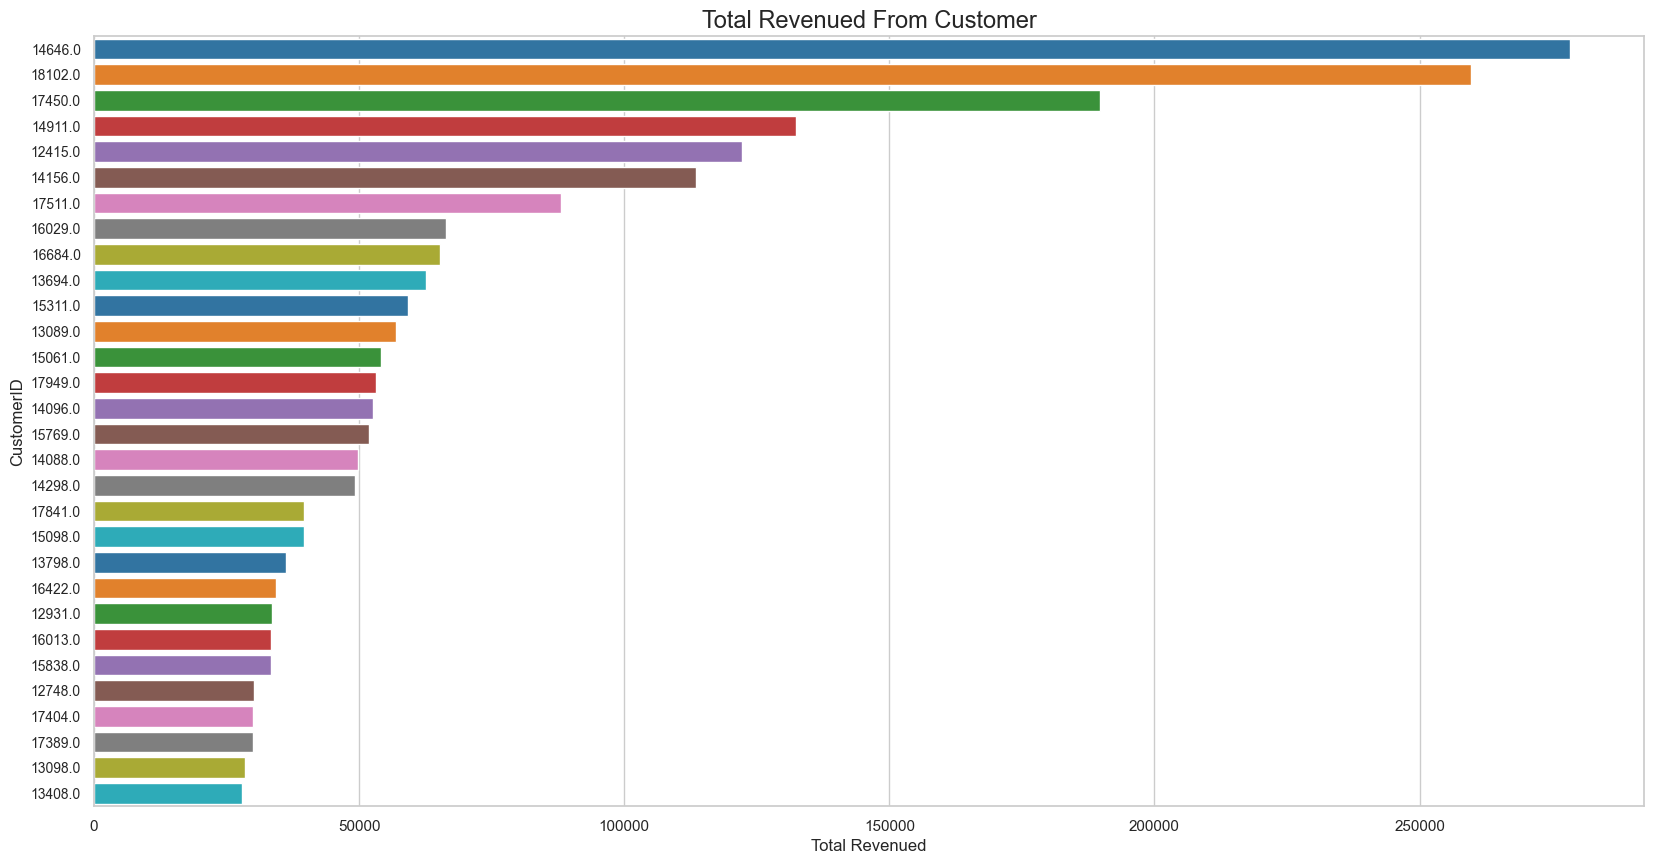

In [151]:
plt.figure(figsize=(20,10))
sns.barplot(data=revenued_customer.head(30), x='Total Revenued', y='CustomerID', palette='tab10')
plt.xlabel('Total Revenued')
plt.ylabel('CustomerID')
plt.title('Total Revenued From Customer', fontsize=17)
plt.yticks(fontsize=10)
plt.show()

### Perbandingan Harga Tiap Item

In [162]:
perbandingan_harga_item = clean[['Description', 'UnitPrice']]

In [163]:
perbandingan_harga_item = perbandingan_harga_item.drop_duplicates(subset=['Description'])
perbandingan_harga_item = perbandingan_harga_item.sort_values('UnitPrice', ascending=False)
perbandingan_harga_item.head()

,Description,UnitPrice
157135,PICNIC BASKET WICKER 60 PIECES,649.5
3731,VINTAGE RED KITCHEN CABINET,295.0
15959,LOVE SEAT ANTIQUE WHITE METAL,175.0
12621,REGENCY MIRROR WITH SHUTTERS,165.0
244,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.0


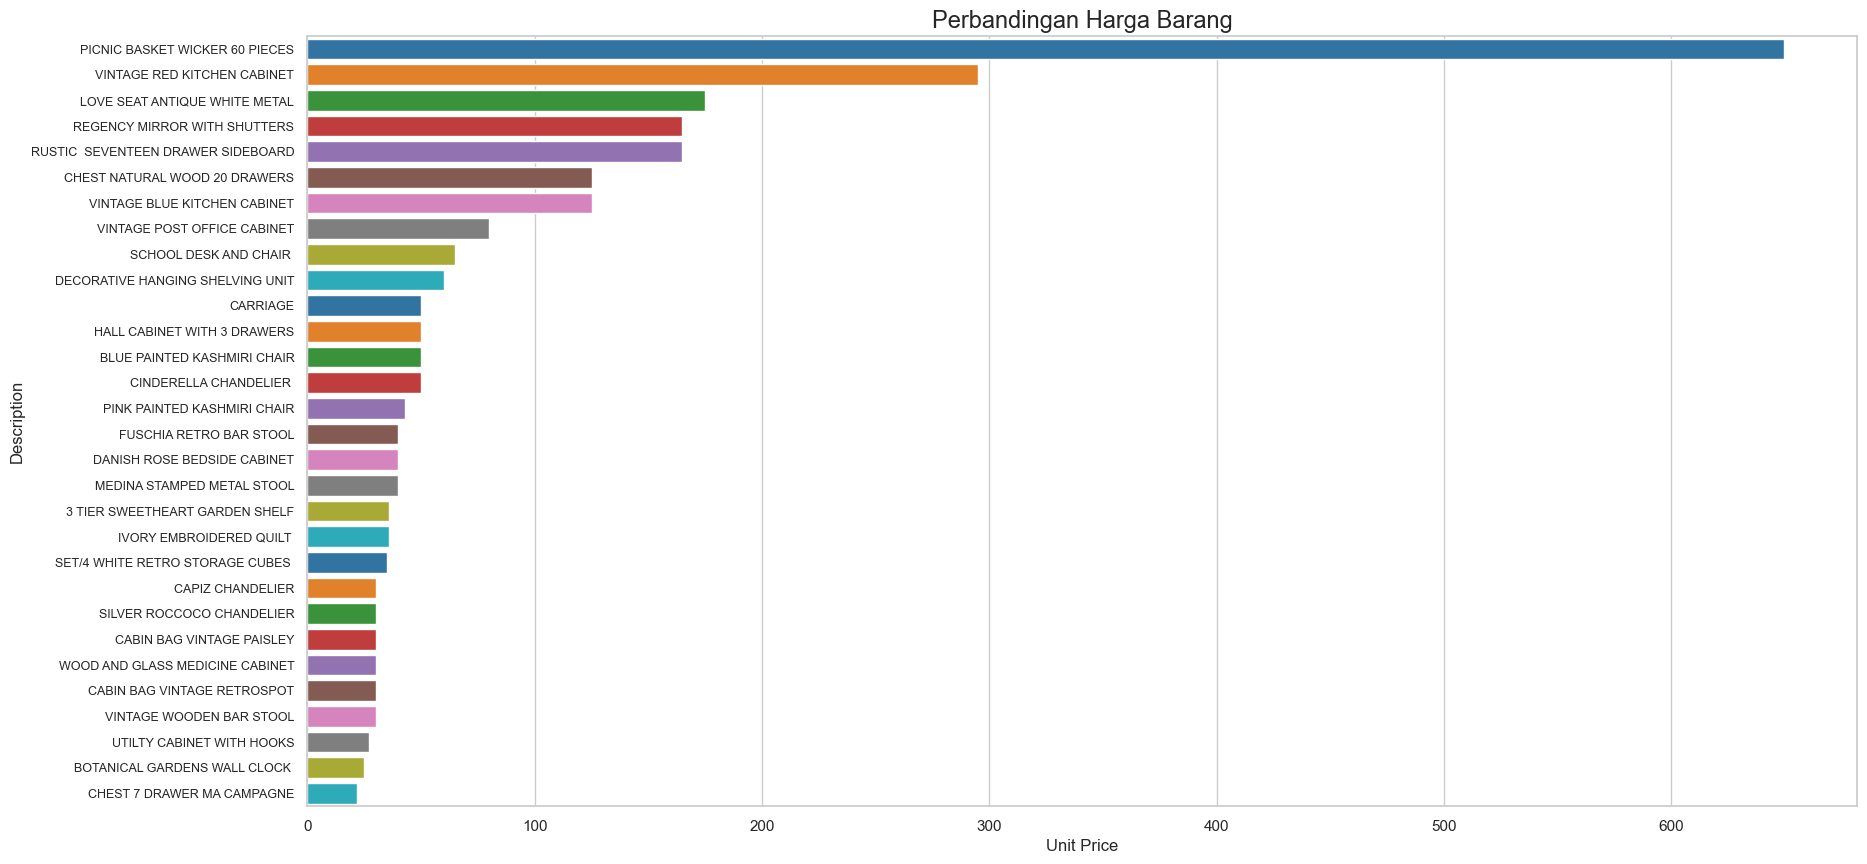

In [167]:
plt.figure(figsize=(20,10))
sns.barplot(data=perbandingan_harga_item.head(30), x='UnitPrice', y='Description', palette='tab10')
plt.title('Perbandingan Harga Barang', fontsize=17)
plt.xlabel('Unit Price')
plt.ylabel('Description')
plt.yticks(fontsize=9)
#plt.axvline(perbandingan_harga_item['UnitPrice'].mean(), color='green', linestyle='--')

plt.show()

In [44]:
#take min value of Description == POSTAGE of each country
min = df[df['Description'] == 'POSTAGE'].groupby('Country')['UnitPrice'].min()
min = min.sort_values(ascending=True)

In [45]:
#take max value of Description == POSTAGE of each country
max = df[df['Description'] == 'POSTAGE'].groupby('Country')['UnitPrice'].max()
max = max.sort_values(ascending=False)

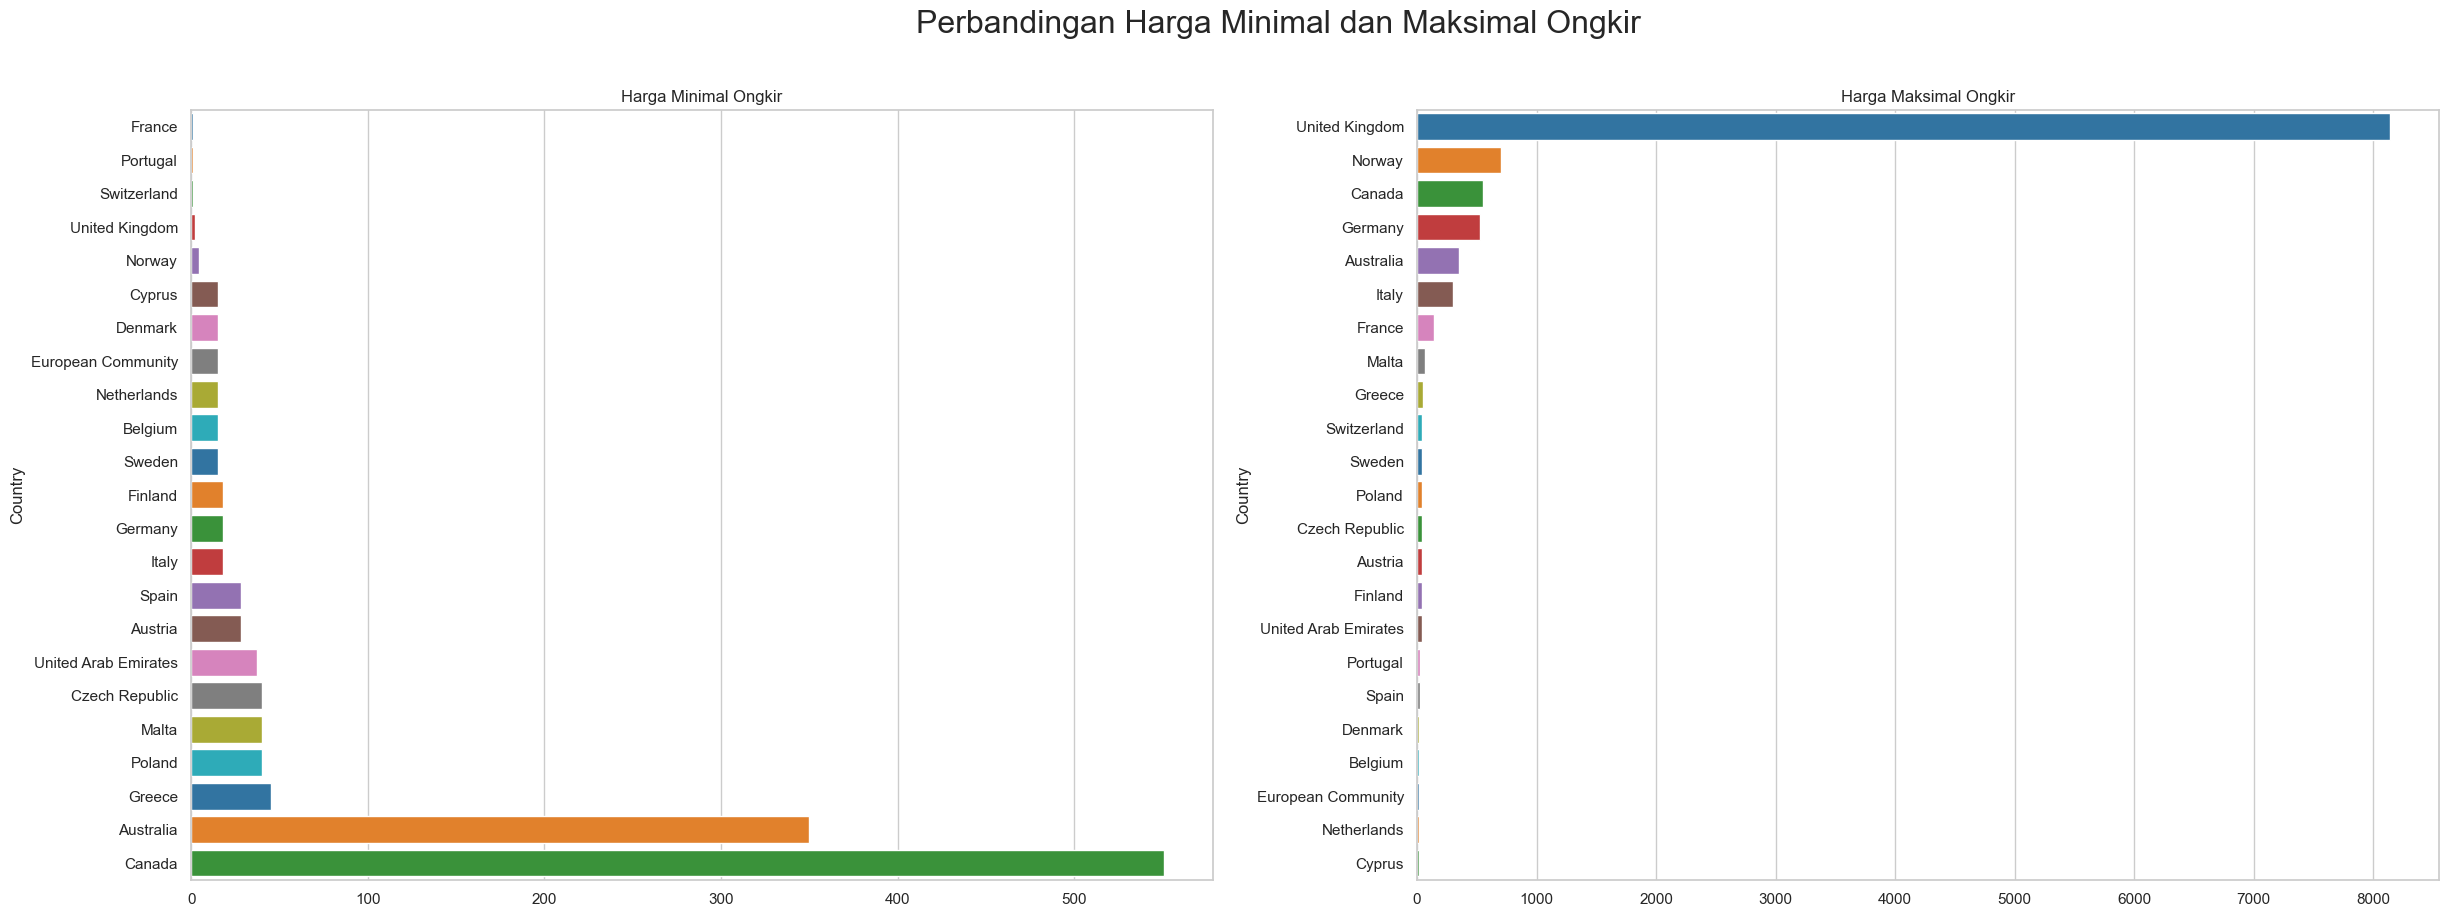

In [171]:
#create facetgrip for max and min
fig, ax = plt.subplots(1,2, figsize=(29,10))
fig.suptitle('Perbandingan Harga Minimal dan Maksimal Ongkir', fontsize=23)
sns.barplot(x = min.values, y = min.index, ax=ax[0], palette='tab10')
sns.barplot(x = max.values, y = max.index, ax=ax[1], palette='tab10')
ax[0].set_title('Harga Minimal Ongkir')
ax[1].set_title('Harga Maksimal Ongkir')
plt.show()

In [47]:
#groupby country who has postage then search what country not isin that grouping
not_postage = df[~df['Country'].isin(df[df['Description'] == 'POSTAGE']['Country'].unique())]['Country'].unique()
#convert not_apostage to dataframe
not_postage = pd.DataFrame(not_postage, columns=['Country'])
#start index from 1
not_postage.index = np.arange(1, len(not_postage) + 1)
not_postage

,Country
1,EIRE
2,Lithuania
3,Japan
4,Iceland
5,Channel Islands
6,Israel
7,Singapore
8,Lebanon
9,Saudi Arabia
10,Unspecified


### Heatmap tren item per periode

In [177]:
period_months = clean.groupby(['Description', 'year', 'month', 'day_of_week'])['Quantity'].agg('sum').reset_index()
period_months = period_months.pivot_table(index='Description', columns=['month', 'year'], values='Quantity', aggfunc='sum', fill_value=0)
#order the table like in my on_demand dataframe
period_months = period_months.loc[on_demand.Description]
#create a dataframe with the monthly sales
period_months

month                                  1     2     3      4     5     6    
year                                 2011  2011  2011   2011  2011  2011   
Description                                                                
WORLD WAR 2 GLIDERS ASSTD DESIGNS    1488  3457  3888  10128  3888  1920  \
JUMBO BAG RED RETROSPOT              2517  2969  4923   2207  3466  3523   
ASSORTED COLOUR BIRD ORNAMENT        1715  1619  2497   2368  3035  1516   
WHITE HANGING HEART T-LIGHT HOLDER   5456  1820  1901   1789  3831  1599   
PACK OF 72 RETROSPOT CAKE CASES      3327  1912  3720   2768  3212  1778   
...                                   ...   ...   ...    ...   ...   ...   
WHITE CHERRY LIGHTS                    -8     0     0      0     0     0   
ROBIN CHRISTMAS CARD                  -12     0     0      0     0     0   
PINK POODLE HANGING DECORATION        -12     0     0      0     0     0   
ASSORTED TUTTI FRUTTI ROUND BOX       -24     0     0      0     0     0   
ROTATING SILVER ANGELS T-LIGHT HLDR     0     0     0      1    60     4   

month                                  7     8     9     10    11    12        
year                                 2011  2011  2011  2011  2011  2010  2011  
Description                                                                    
WORLD WAR 2 GLIDERS ASSTD DESIGNS    3552  2256  3462  8174  4500  5139  1363  
JUMBO BAG RED RETROSPOT              2967  5177  4043  4628  5576  2030  1040  
ASSORTED COLOUR BIRD ORNAMENT        1770  6424  3000  2639  5190  2267  1274  
WHITE HANGING HEART T-LIGHT HOLDER   2964  2035  2422  1648  4855  3083   744  
PACK OF 72 RETROSPOT CAKE CASES      2603  2837  3134  1926  2366  3542   284  
...                                   ...   ...   ...   ...   ...   ...   ...  
WHITE CHERRY LIGHTS                     0     0     0     0     0     0     0  
ROBIN CHRISTMAS CARD                    0     0     0     0     0     3     0  
PINK POODLE HANGING DECORATION          0     0     0     0     0     0     0  
ASSORTED TUTTI FRUTTI ROUND BOX         0     0     0     0     0     0     0  
ROTATING SILVER ANGELS T-LIGHT HLDR   128   113   745  1990  2314 -7542   727  

[3780 rows x 13 columns]

#### per month

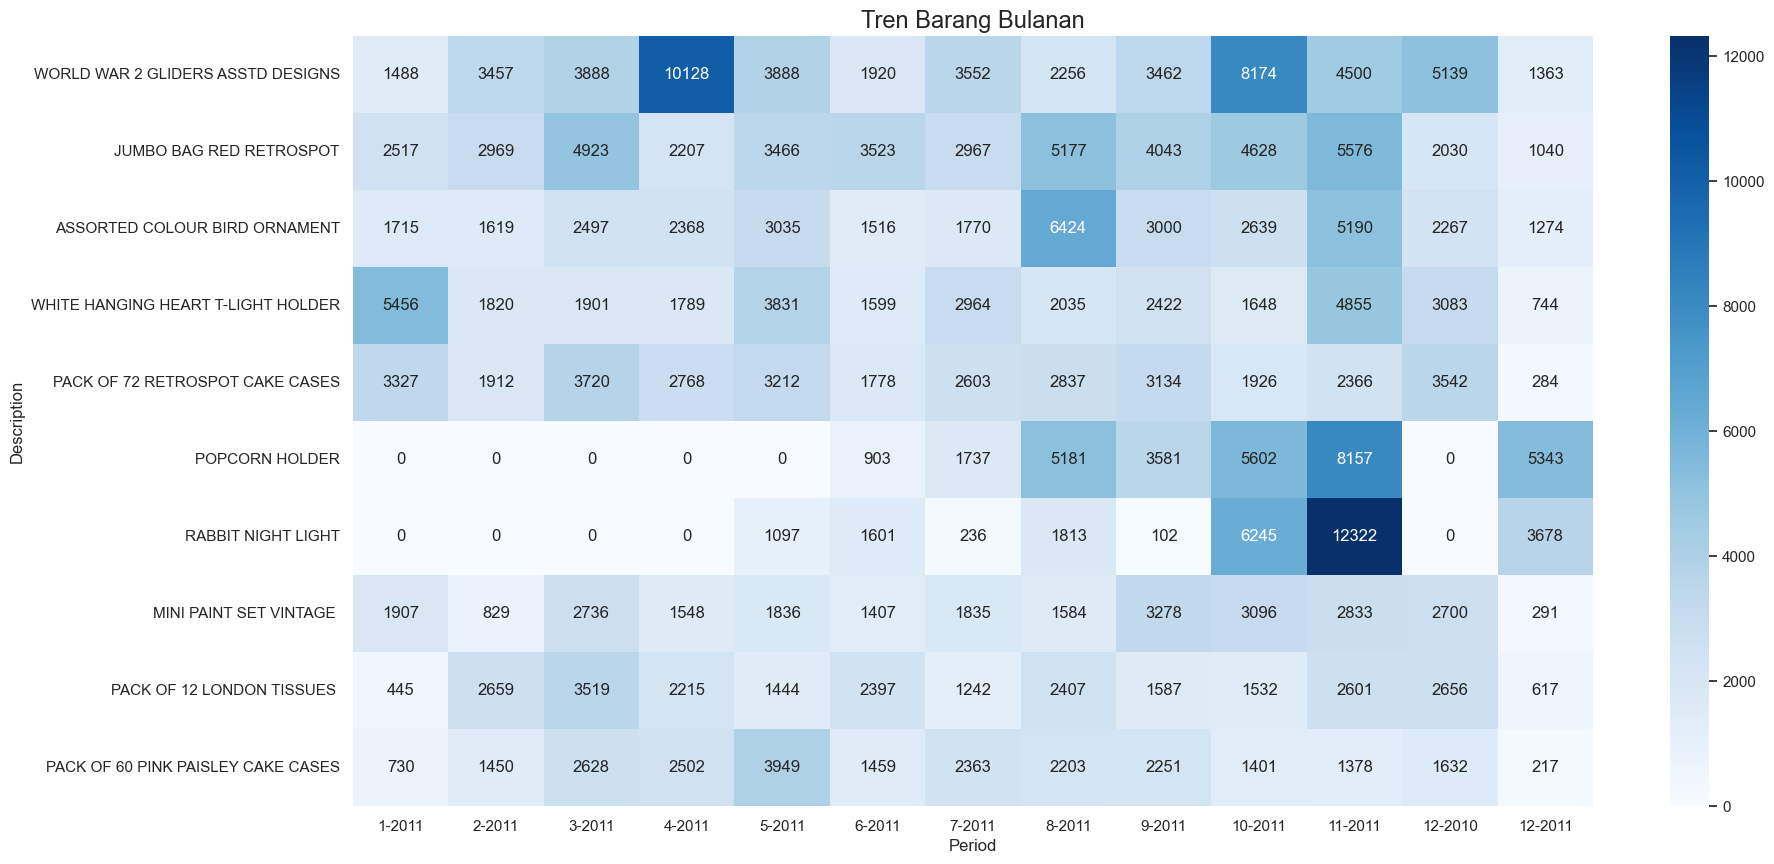

In [178]:
#make the period plot for 10 items
plt.figure(figsize=(20,10))
sns.heatmap(period_months.iloc[:10], cmap='Blues', annot=True, fmt='g')
plt.title('Tren Barang Bulanan', fontsize=17)
plt.xlabel('Period')
plt.ylabel('Description')
plt.show()

#### per day of week

In [181]:
period_dayofweek = clean.groupby(['Description', 'year', 'month', 'day_of_week', 'hour'])['Quantity'].agg('sum').reset_index()
period_dayofweek['day_of_week'] = pd.Categorical(period_dayofweek['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
period_dayofweek = period_dayofweek.sort_values(by='day_of_week')
period_dayofweek = period_dayofweek.pivot_table(index='Description', columns=['day_of_week'], values='Quantity', aggfunc='sum', fill_value=0)
#order the table like in my on_demand dataframe
period_dayofweek = period_dayofweek.loc[on_demand.Description]
#create a dataframe with the monthly sales
period_dayofweek

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Description,,,,,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,6360,6790,10146,17963,8305,0,3651
JUMBO BAG RED RETROSPOT,7213,8307,9533,10918,6301,0,2794
ASSORTED COLOUR BIRD ORNAMENT,4929,5492,6545,11145,4305,0,2898
WHITE HANGING HEART T-LIGHT HOLDER,4466,9652,5515,8100,3271,0,3143
PACK OF 72 RETROSPOT CAKE CASES,5386,5747,7115,7817,4753,0,2591
...,...,...,...,...,...,...,...
WHITE CHERRY LIGHTS,0,0,-8,0,0,0,0
ROBIN CHRISTMAS CARD,0,0,-12,0,0,0,3
PINK POODLE HANGING DECORATION,0,0,-12,0,0,0,0


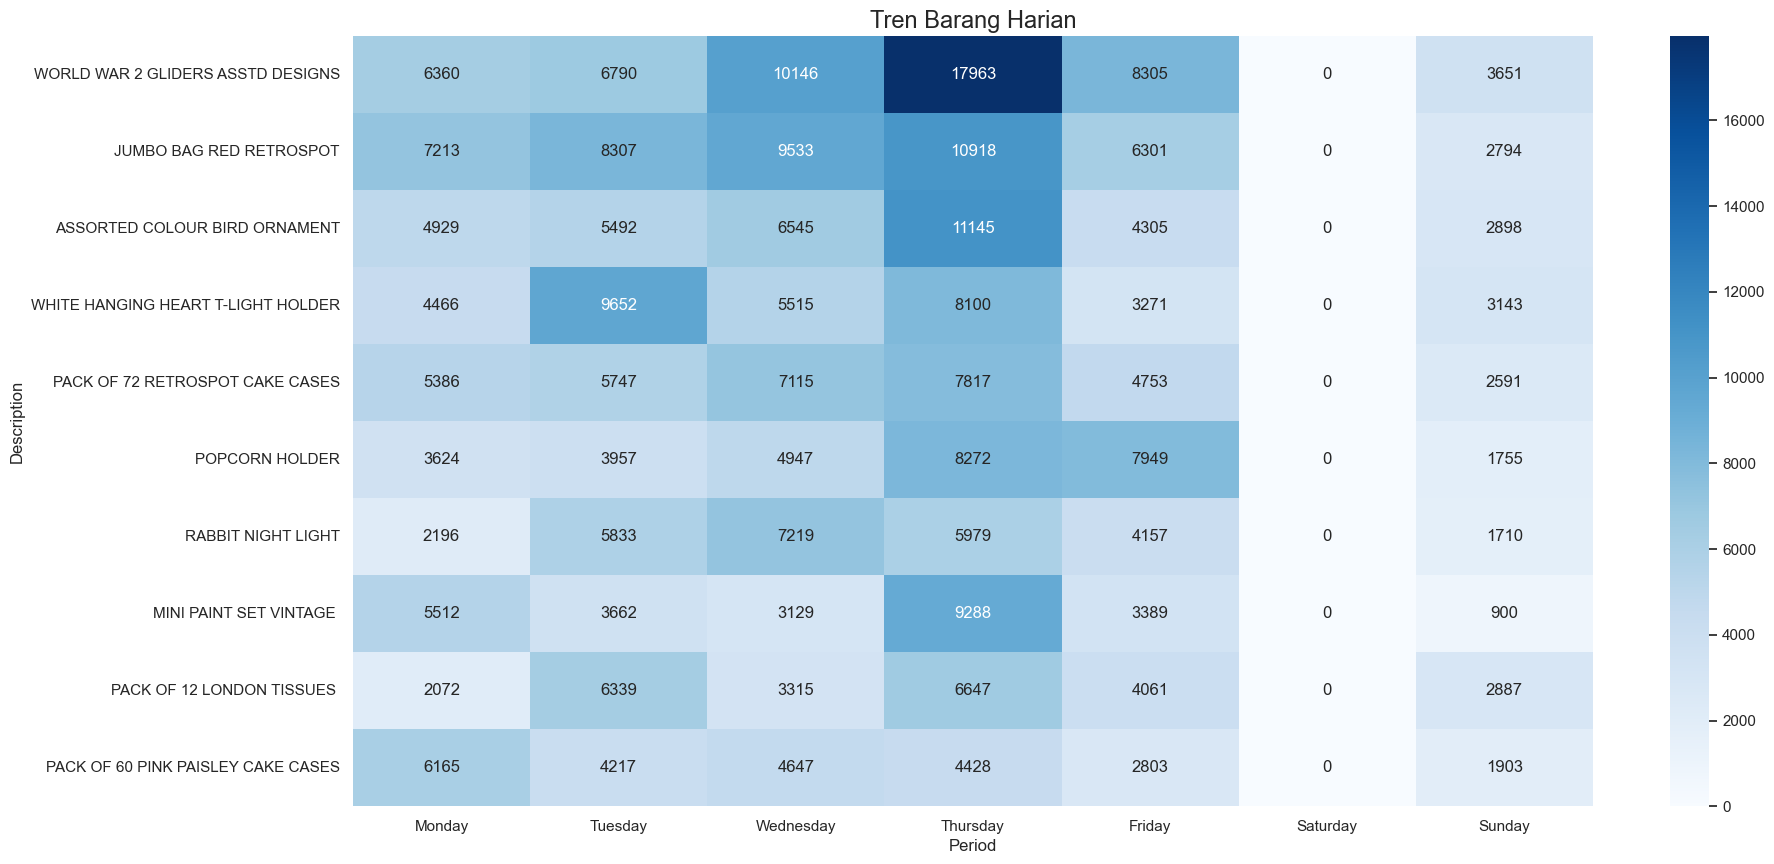

In [182]:
#make the period plot for 10 items
plt.figure(figsize=(20,10))
sns.heatmap(period_dayofweek.iloc[:10], cmap='Blues', annot=True, fmt='g')
plt.title('Tren Barang Harian', fontsize=17)
plt.xlabel('Period')
plt.ylabel('Description')
plt.show()

### Tren Barang Berdasarkan Harga

#### Month

In [188]:
item_price_trend = clean.groupby(['Description', 'year', 'month', 'day_of_week'])['Quantity'].agg('sum').reset_index()
item_price_trend = item_price_trend.pivot_table(index='Description', columns=['month', 'year'], values='Quantity', aggfunc='sum', fill_value=0)
#order the table like in my on_demand dataframe
item_price_trend = item_price_trend.loc[perbandingan_harga_item.Description]
#create a dataframe with the monthly sales
item_price_trend

month                                1    2    3    4    5     6     7     8    
year                               2011 2011 2011 2011 2011  2011  2011  2011   
Description                                                                     
PICNIC BASKET WICKER 60 PIECES        0    0    0    0    0    61     0     0  \
VINTAGE RED KITCHEN CABINET          11    2    6    6    4     5     1    -3   
LOVE SEAT ANTIQUE WHITE METAL         0    0    3    3    2     0     7     7   
REGENCY MIRROR WITH SHUTTERS          0    2    3    0    1     0     0     0   
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    3    7    4    2    3     0     0     1   
...                                 ...  ...  ...  ...  ...   ...   ...   ...   
POPART WOODEN PENCILS ASST            0    0  200    0    0  1200  2100  1000   
WRAP BAD HAIR DAY                     0    0   25   25   75    25   150    50   
DISCO BALL CHRISTMAS DECORATION      72   48  168   49  128   438   294  1152   
PORCELAIN BUDAH INCENSE HOLDER      108  200   60  200    0   201     1    30   
PADS TO MATCH ALL CUSHIONS            0    0    0    1    0     0     1     0   

month                                 9     10    11    12        
year                                2011  2011  2011  2010  2011  
Description                                                       
PICNIC BASKET WICKER 60 PIECES         0     0     0     0     0  
VINTAGE RED KITCHEN CABINET            3     3     1    11     0  
LOVE SEAT ANTIQUE WHITE METAL         11     4    16     2    -1  
REGENCY MIRROR WITH SHUTTERS           1     0     2     1     0  
RUSTIC  SEVENTEEN DRAWER SIDEBOARD     4     4     1     3     0  
...                                  ...   ...   ...   ...   ...  
POPART WOODEN PENCILS ASST          1400  1700  1000   100   200  
WRAP BAD HAIR DAY                    175    50   125     0     0  
DISCO BALL CHRISTMAS DECORATION      313  2357  4391  1858  1446  
PORCELAIN BUDAH INCENSE HOLDER       200   200   201   100     0  
PADS TO MATCH ALL CUSHIONS             2     0     0     0     0  

[3780 rows x 13 columns]

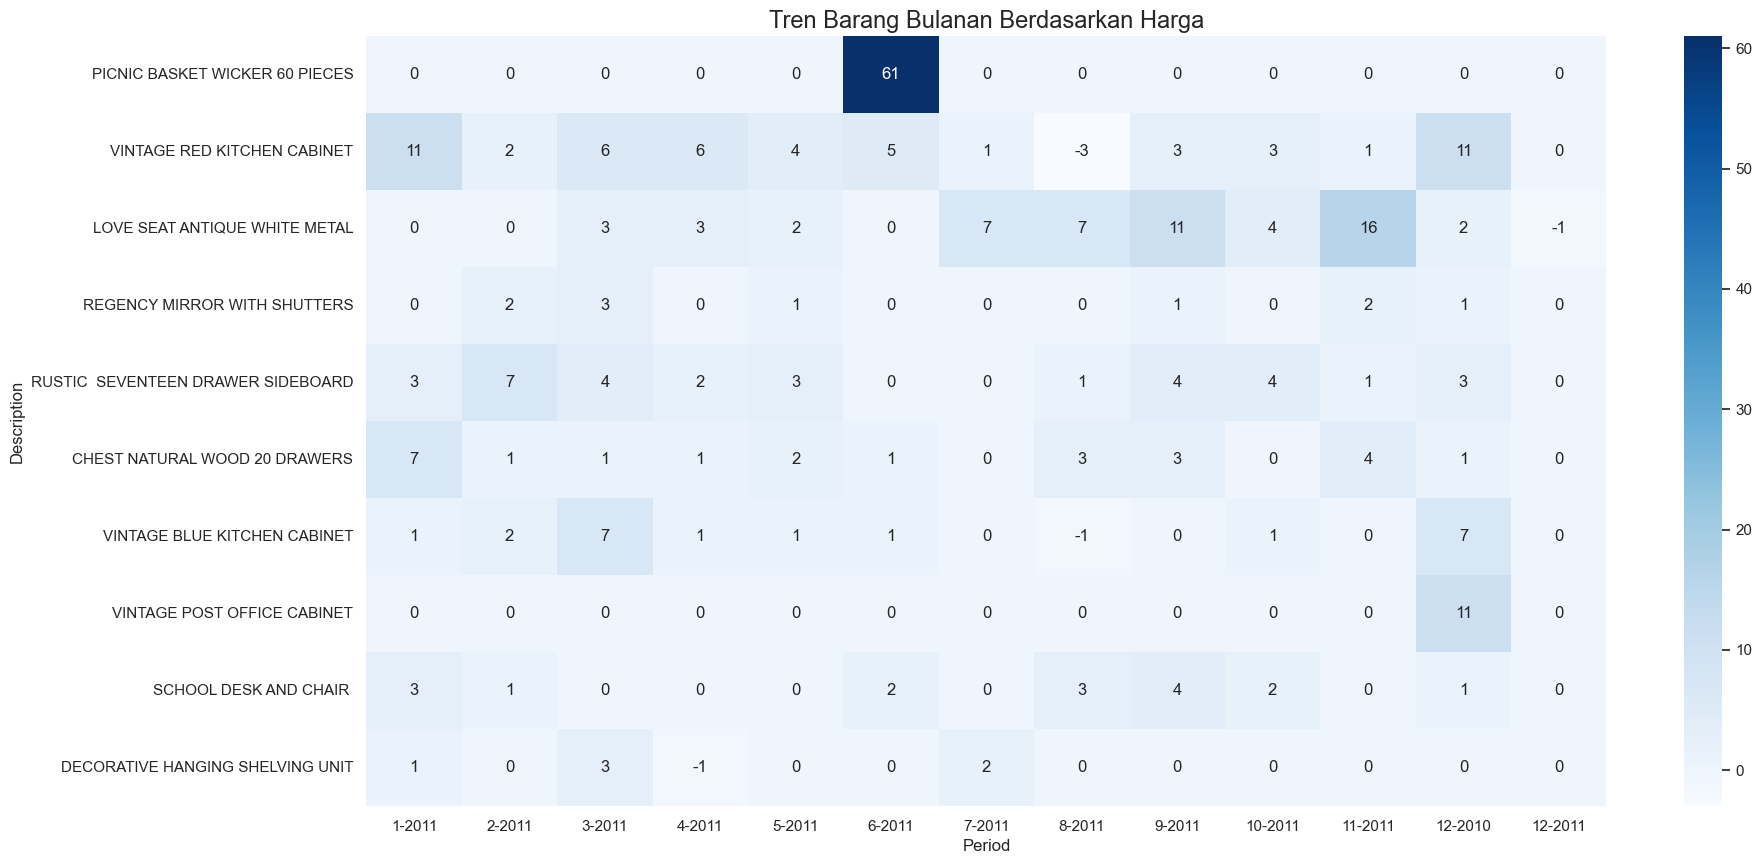

In [189]:
#make the period plot for 10 items
plt.figure(figsize=(20,10))
sns.heatmap(item_price_trend.iloc[:10], cmap='Blues', annot=True, fmt='g')
plt.title('Tren Barang Bulanan Berdasarkan Harga', fontsize=17)
plt.xlabel('Period')
plt.ylabel('Description')
plt.show()

#### Day Of Week

In [190]:
dayofweek_compared_item = clean.groupby(['Description', 'year', 'month', 'day_of_week', 'hour'])['Quantity'].agg('sum').reset_index()
dayofweek_compared_item['day_of_week'] = pd.Categorical(dayofweek_compared_item['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
dayofweek_compared_item = dayofweek_compared_item.sort_values(by='day_of_week')
dayofweek_compared_item = dayofweek_compared_item.pivot_table(index='Description', columns=['day_of_week'], values='Quantity', aggfunc='sum', fill_value=0)
#order the table like in my on_demand dataframe
dayofweek_compared_item = dayofweek_compared_item.loc[perbandingan_harga_item.Description]
#create a dataframe with the monthly sales
dayofweek_compared_item

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Description,,,,,,,
PICNIC BASKET WICKER 60 PIECES,0,0,0,0,61,0,0
VINTAGE RED KITCHEN CABINET,13,8,11,12,2,0,4
LOVE SEAT ANTIQUE WHITE METAL,8,9,14,14,7,0,2
REGENCY MIRROR WITH SHUTTERS,2,1,3,1,3,0,0
RUSTIC SEVENTEEN DRAWER SIDEBOARD,6,2,9,9,3,0,3
...,...,...,...,...,...,...,...
POPART WOODEN PENCILS ASST,1800,700,1100,2300,900,0,2100
WRAP BAD HAIR DAY,75,300,100,125,50,0,50
DISCO BALL CHRISTMAS DECORATION,2118,1944,4500,1664,1210,0,1278


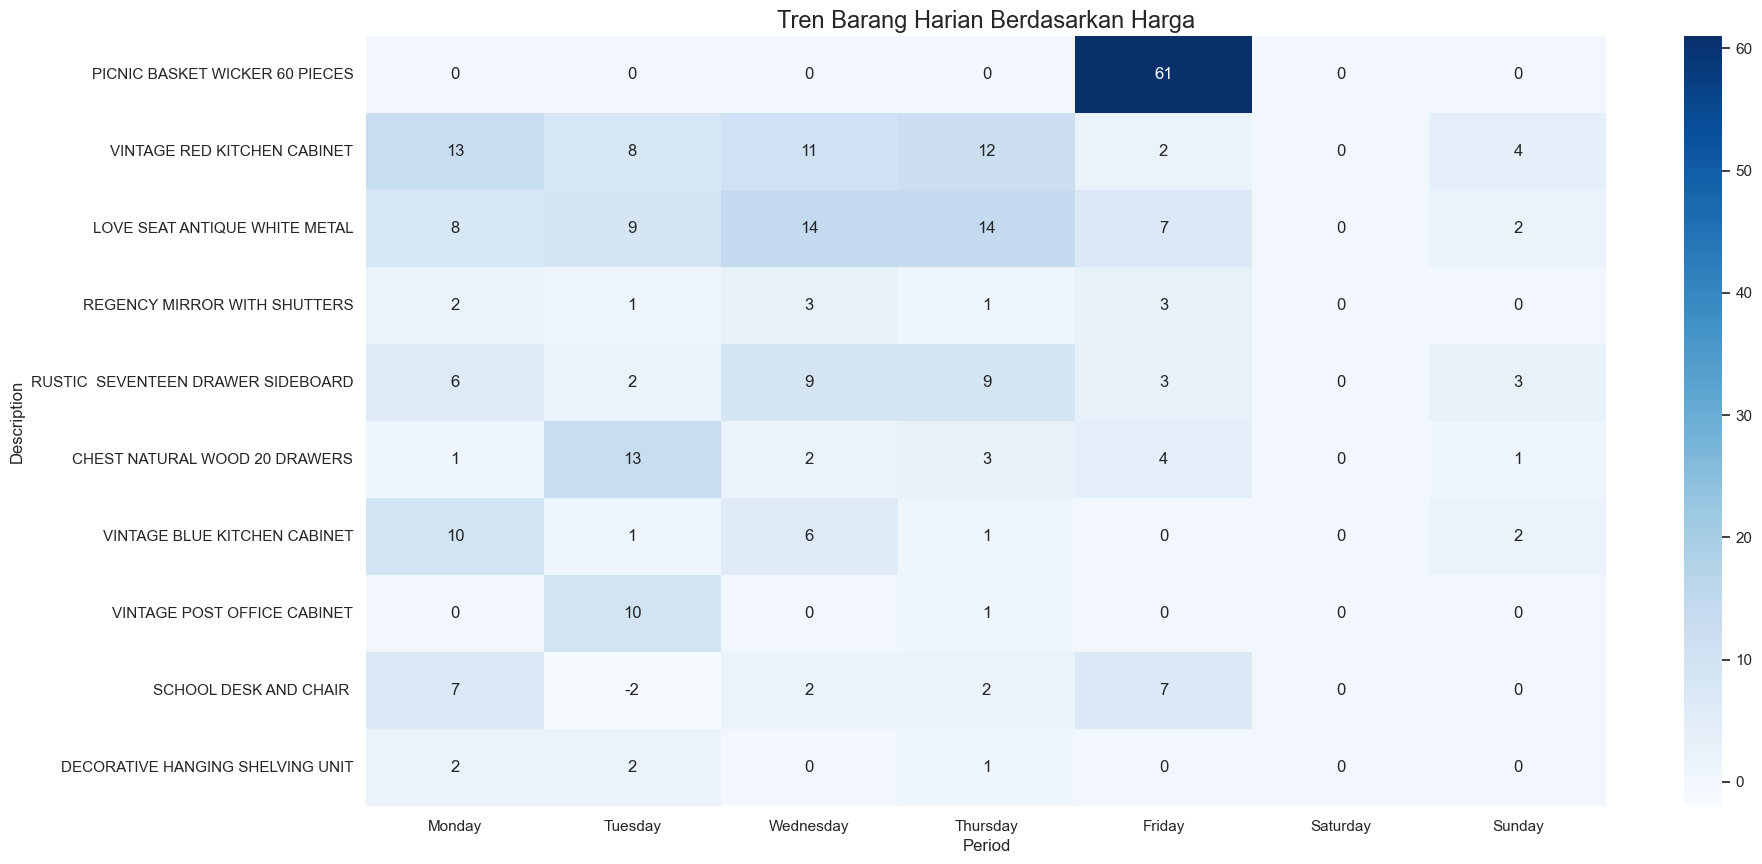

In [191]:
#make the period plot for 10 items
plt.figure(figsize=(20,10))
sns.heatmap(dayofweek_compared_item.iloc[:10], cmap='Blues', annot=True, fmt='g')
plt.title('Tren Barang Harian Berdasarkan Harga', fontsize=17)
plt.xlabel('Period')
plt.ylabel('Description')
plt.show()